# Predictive Modeling for HIV Exploring Health Indicator Data

## TEAM DETAILS

### <U> TEAM NO <U>: 02

|ROLL_NO     |NAME                              |USN                             |
|------------|----------------------------------|--------------------------------|
|34|DHANUSH KAMATAR|02FE22BCS034|
|62|SONALI JADHAV|02FE22BCS146|
|65|SOURABH NAYAK|02FE22BCS150|
|67|STUTI HUNACHAGI|02FE22BCS154|

# Problem Statement:
 ### * To identify high-risk individuals and enable focused treatments for HIV prenvention and improved health outcomes.
  ### * To predict the models for HIV risk assessment are being developed using demographic, behavioral, and healthcare data.

### LIBRARY DESCRIPTION

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


In [387]:
import pandas as pd
data=pd.read_csv("HIV.csv")
data

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040.0,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423.0,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605.0,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,NaN,7.0,63.0,32.0,NaN,NaN,55.0,12.0,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1.0,1.4,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021,Staten Island,Willowbrook,Women,60+,Asian/Pacific Islander,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
31921,2021,Staten Island,Willowbrook,Women,60+,Black,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0
31922,2021,Staten Island,Willowbrook,Women,60+,Latinx/Hispanic,0.0,0.0,0.0,NaN,0.0,0.0,0.7,0.5,0.0,0.0,0.0,0.0
31923,2021,Staten Island,Willowbrook,Women,60+,Other/Unknown,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


## Dataset description: 
### This dataset is choosen from the Data.gov Website: 
https://catalog.data.gov/dataset/dohmh-hiv-aids-annual-report

### The HIV Prediction Dataset is a comprehensive collection of data designed to facilitate the investigation and forecasting of HIV-related mortality. Numerous attributes are included in this dataset, including the year of data collection ,demographic information, and treatment plan.



### Attribute information: 
1.Year: The year of the data record.

2.Borough: The borough within New York City where the data was collected.

3.UHF: The United Hospital Fund (UHF) neighborhood within the borough.

4.Gender: Gender of the individuals in the dataset (e.g., Male, Female , Transgender).

5.Age: Age group of the individuals (e.g., 13 - 19, 20 - 29, etc.).

6.Race: Race or ethnic group of the individuals.

7.HIV diagnoses: Number of HIV diagnoses.

8.HIV diagnosis rate: Rate of HIV diagnoses per 100,000 people.

9.Concurrent diagnoses: Concurrent diagnoses of HIV and another condition.

10.% linked to care within 3 months: Percentage of HIV-diagnosed individuals linked to care within 3 months.

11.AIDS diagnoses: Number of AIDS diagnoses.

12.AIDS diagnosis rate: Rate of AIDS diagnoses per 100,000 people.

13.PLWDHI prevalence: Prevalence of people living with diagnosed HIV infection.

14.% viral suppression: Percentage of people with viral suppression among those diagnosed with HIV.

15.Deaths: Number of deaths.

16.Death rate: Death rate per 100,000 people.

17.HIV-related death rate: Death rate due to HIV-related causes per 100,000 people.

18.Non-HIV-related death rate: Death rate due to non-HIV-related causes per 100,000 people.

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31925 entries, 0 to 31924
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              31925 non-null  int64  
 1   Borough                           31925 non-null  object 
 2   UHF                               31925 non-null  object 
 3   Gender                            31925 non-null  object 
 4   Age                               31925 non-null  object 
 5   Race                              31925 non-null  object 
 6   HIV diagnoses                     31509 non-null  float64
 7   HIV diagnosis rate                31504 non-null  float64
 8   Concurrent diagnoses              31809 non-null  float64
 9   % linked to care within 3 months  17129 non-null  float64
 10  AIDS diagnoses                    31587 non-null  float64
 11  AIDS diagnosis rate               31582 non-null  float64
 12  PLWD

# Data types

## 1.Quantitative data -{Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate}

## 2.Qualitative data-{Borough, Gender,Race,Age}

# Finding null values,outliers,duplicates and skewness:


### Count of Null values in each attribute:

In [389]:
data.isna().sum()

Year                                    0
Borough                                 0
UHF                                     0
Gender                                  0
Age                                     0
Race                                    0
HIV diagnoses                         416
HIV diagnosis rate                    421
Concurrent diagnoses                  116
% linked to care within 3 months    14796
AIDS diagnoses                        338
AIDS diagnosis rate                   343
PLWDHI prevalence                    3572
% viral suppression                  2068
Deaths                                  2
Death rate                           1913
HIV-related death rate               3114
Non-HIV-related death rate           3114
dtype: int64

### Unique values:

In [390]:
data.nunique()

Year                                  10
Borough                                6
UHF                                   43
Gender                                 6
Age                                    8
Race                                   7
HIV diagnoses                        409
HIV diagnosis rate                  1962
Concurrent diagnoses                 157
% linked to care within 3 months     124
AIDS diagnoses                       312
AIDS diagnosis rate                 1524
PLWDHI prevalence                    168
% viral suppression                  169
Deaths                               373
Death rate                           757
HIV-related death rate               421
Non-HIV-related death rate           588
dtype: int64

### Heat Map Analysis for Null values:


<Axes: >

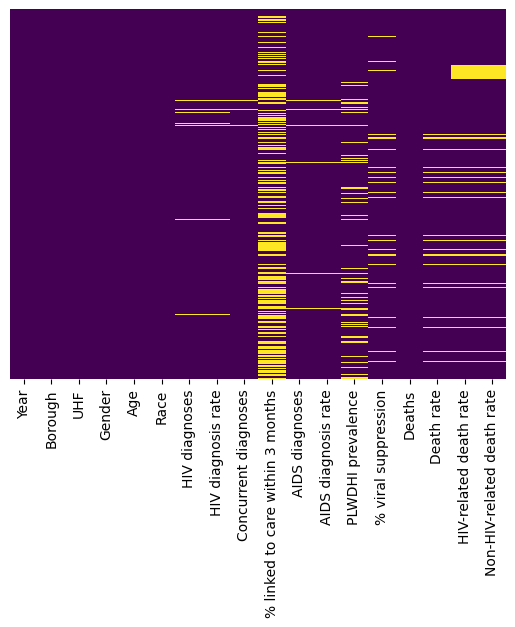

In [391]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Skewness before imputing null values

In [392]:
columns = data.select_dtypes(include=[np.number])

# Calculate skewness
skewness = columns.skew()
# Print skewness for each attribute
print("Skewness of each attribute:")
print(skewness)

Skewness of each attribute:
Year                                -1.002327
HIV diagnoses                       23.929606
HIV diagnosis rate                   5.048053
Concurrent diagnoses                23.912903
% linked to care within 3 months     1.399666
AIDS diagnoses                      25.512635
AIDS diagnosis rate                  4.533074
PLWDHI prevalence                    3.502731
% viral suppression                  1.669383
Deaths                              19.097366
Death rate                          20.355108
HIV-related death rate              38.041896
Non-HIV-related death rate          27.427791
dtype: float64


# NULL VALUES IMPUTATION BY KNN METHOD:

In [393]:
from sklearn.impute import KNNImputer
# Initialize the KNNImputer with k=5 (default)
imputer = KNNImputer(n_neighbors=5)
# Select only numerical columns for KNN Imputation
numerical_cols = data.select_dtypes(include=[np.number]).columns
# Perform KNN imputation
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


In [394]:
data.isna().sum()

Year                                0
Borough                             0
UHF                                 0
Gender                              0
Age                                 0
Race                                0
HIV diagnoses                       0
HIV diagnosis rate                  0
Concurrent diagnoses                0
% linked to care within 3 months    0
AIDS diagnoses                      0
AIDS diagnosis rate                 0
PLWDHI prevalence                   0
% viral suppression                 0
Deaths                              0
Death rate                          0
HIV-related death rate              0
Non-HIV-related death rate          0
dtype: int64

# SKEWNESS AFTER THE NULL VALUES IMPUTATION:

In [395]:
columns = data.select_dtypes(include=[np.number])

# Calculate skewness
skewness1 = columns.skew()
# Print skewness for each attribute
print("Skewness of each attribute:")
print(skewness1)

Skewness of each attribute:
Year                                -1.002327
HIV diagnoses                       24.081611
HIV diagnosis rate                   5.062690
Concurrent diagnoses                23.954764
% linked to care within 3 months     2.107490
AIDS diagnoses                      25.643272
AIDS diagnosis rate                  4.539108
PLWDHI prevalence                    3.441474
% viral suppression                  1.736058
Deaths                              19.097954
Death rate                          20.491654
HIV-related death rate              39.403001
Non-HIV-related death rate          28.012629
dtype: float64


## Duplicate values:


In [396]:
import pandas as pd

duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [Year, Borough, UHF, Gender, Age, Race, HIV diagnoses, HIV diagnosis rate, Concurrent diagnoses, % linked to care within 3 months, AIDS diagnoses, AIDS diagnosis rate, PLWDHI prevalence, % viral suppression, Deaths, Death rate, HIV-related death rate, Non-HIV-related death rate]
Index: []


 ### There are no duplicate values in dataset.

# OUTLIER IMPUTATION:

 ## Skewness before imputation:

## counting the outliers in each attributes

In [397]:
# Counting the ouliers in each feature
import numpy as np
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)
        Q3=data[column].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1-3*IQR
        upper = Q3+3*IQR
        ot_cnt = ((data[column]<lower) | (data[column]>upper)).sum()
        ot_percentage = np.divide(np.multiply(ot_cnt,100),308854)
        ot_round = np.round(ot_percentage,decimals=0)
        print(column,  " : "   ,ot_cnt,"     :    ",ot_round,"%")

Year  :  0      :     0.0 %
HIV diagnoses  :  3273      :     1.0 %
HIV diagnosis rate  :  1231      :     0.0 %
Concurrent diagnoses  :  2544      :     1.0 %
% linked to care within 3 months  :  6478      :     2.0 %
AIDS diagnoses  :  2801      :     1.0 %
AIDS diagnosis rate  :  1441      :     0.0 %
PLWDHI prevalence  :  723      :     0.0 %
% viral suppression  :  6273      :     2.0 %
Deaths  :  3364      :     1.0 %
Death rate  :  1364      :     0.0 %
HIV-related death rate  :  6846      :     2.0 %
Non-HIV-related death rate  :  2655      :     1.0 %


# Imputing Outliers

## Method of capping:This technique involves setting boundaries or "caps" at both ends of the data distribution and adjusting the outliers that fall outside these boundaries.
## * Replace the values that fall outside the determined limits with the respective caps:
## * Lower Cap: Any value below the lower cap is set to the lower cap.
## * Upper Cap: Any value above the upper cap is set to the upper cap

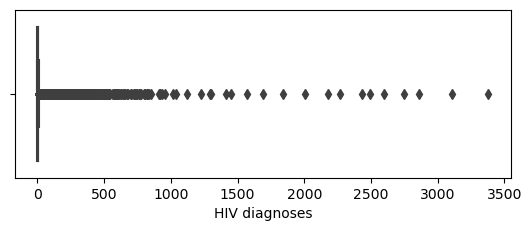

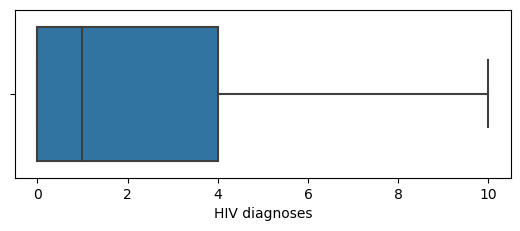

In [398]:
plt.subplot(2,1,1)
sns.boxplot(x=data['HIV diagnoses'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['HIV diagnoses'].quantile(0.25)
Q3= data['HIV diagnoses'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['HIV diagnoses'] = np.where(data['HIV diagnoses'] > upper_limit, upper_limit,np.where(data['HIV diagnoses'] < lower_limit, lower_limit, data['HIV diagnoses']))
plt.subplot(2,1,2)
sns.boxplot(x=data['HIV diagnoses'])
plt.show()

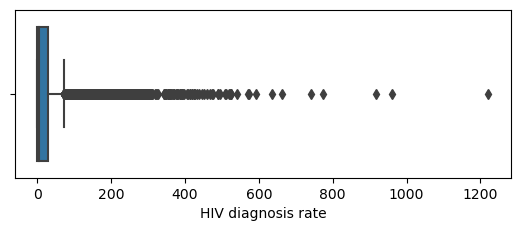

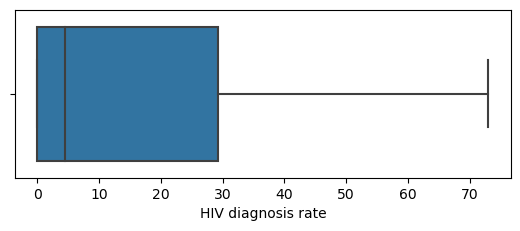

In [399]:
plt.subplot(2,1,1)
sns.boxplot(x=data['HIV diagnosis rate'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['HIV diagnosis rate'].quantile(0.25)
Q3= data['HIV diagnosis rate'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['HIV diagnosis rate'] = np.where(data['HIV diagnosis rate'] > upper_limit, upper_limit,np.where(data['HIV diagnosis rate'] < lower_limit, lower_limit, data['HIV diagnosis rate']))
plt.subplot(2,1,2)
sns.boxplot(x=data['HIV diagnosis rate'])
plt.show()


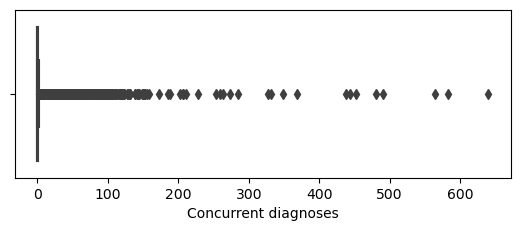

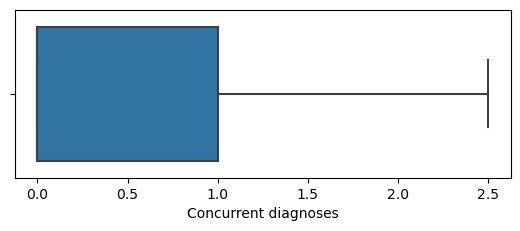

In [400]:
plt.subplot(2,1,1)
sns.boxplot(x=data['Concurrent diagnoses'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['Concurrent diagnoses'].quantile(0.25)
Q3= data['Concurrent diagnoses'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['Concurrent diagnoses'] = np.where(data['Concurrent diagnoses'] > upper_limit, upper_limit,np.where(data['Concurrent diagnoses'] < lower_limit, lower_limit, data['Concurrent diagnoses']))
plt.subplot(2,1,2)
sns.boxplot(x=data['Concurrent diagnoses'])
plt.show()


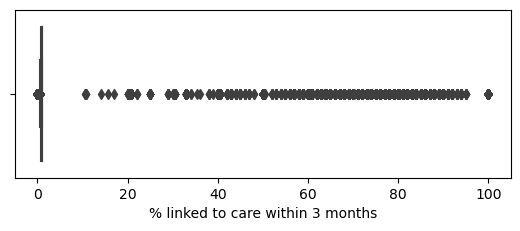

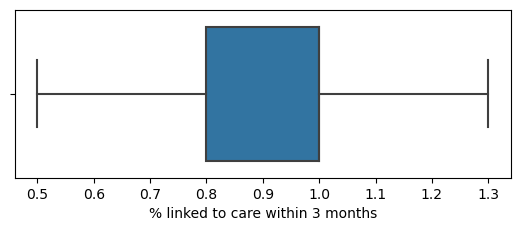

In [401]:
plt.subplot(2,1,1)
sns.boxplot(x=data['% linked to care within 3 months'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['% linked to care within 3 months'].quantile(0.25)
Q3= data['% linked to care within 3 months'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['% linked to care within 3 months'] = np.where(data['% linked to care within 3 months'] > upper_limit, upper_limit,np.where(data['% linked to care within 3 months'] < lower_limit, lower_limit, data['% linked to care within 3 months']))
plt.subplot(2,1,2)
sns.boxplot(x=data['% linked to care within 3 months'])
plt.show()

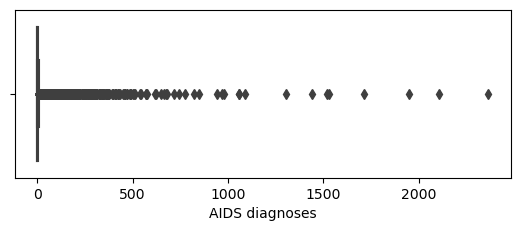

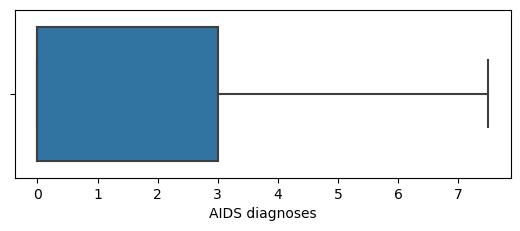

In [402]:
plt.subplot(2,1,1)
sns.boxplot(x=data['AIDS diagnoses'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['AIDS diagnoses'].quantile(0.25)
Q3= data['AIDS diagnoses'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data['AIDS diagnoses'] = np.where(data['AIDS diagnoses'] > upper_limit, upper_limit,np.where(data['AIDS diagnoses'] < lower_limit, lower_limit, data['AIDS diagnoses']))
plt.subplot(2,1,2)
sns.boxplot(x=data['AIDS diagnoses'])
plt.show()

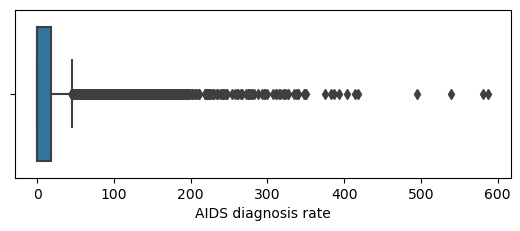

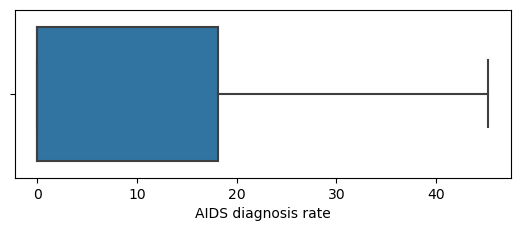

In [403]:
plt.subplot(2,1,1)
sns.boxplot(x=data['AIDS diagnosis rate'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['AIDS diagnosis rate'].quantile(0.25)
Q3= data['AIDS diagnosis rate'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['AIDS diagnosis rate'] = np.where(data['AIDS diagnosis rate'] > upper_limit, upper_limit,np.where(data['AIDS diagnosis rate'] < lower_limit, lower_limit, data['AIDS diagnosis rate']))
plt.subplot(2,1,2)
sns.boxplot(x=data['AIDS diagnosis rate'])
plt.show()


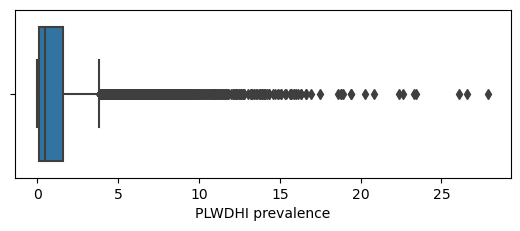

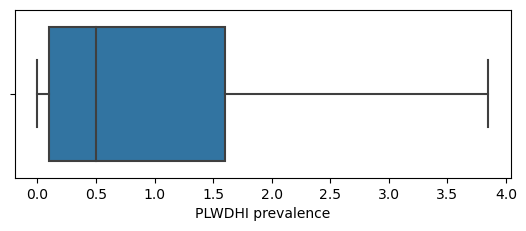

In [404]:
plt.subplot(2,1,1)
sns.boxplot(x=data['PLWDHI prevalence'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['PLWDHI prevalence'].quantile(0.25)
Q3= data['PLWDHI prevalence'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['PLWDHI prevalence'] = np.where(data['PLWDHI prevalence'] > upper_limit, upper_limit,np.where(data['PLWDHI prevalence'] < lower_limit, lower_limit, data['PLWDHI prevalence']))
plt.subplot(2,1,2)
sns.boxplot(x=data['PLWDHI prevalence'])
plt.show()


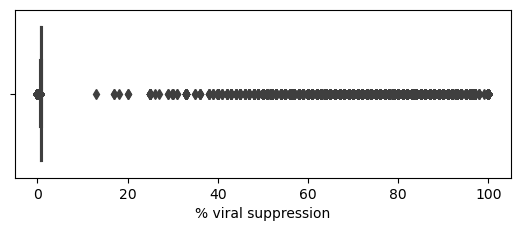

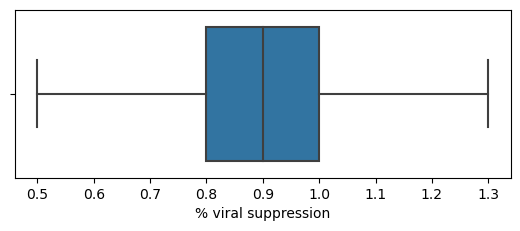

In [405]:

plt.subplot(2,1,1)
sns.boxplot(x=data['% viral suppression'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['% viral suppression'].quantile(0.25)
Q3= data['% viral suppression'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['% viral suppression'] = np.where(data['% viral suppression'] > upper_limit, upper_limit,np.where(data['% viral suppression'] < lower_limit, lower_limit, data['% viral suppression']))
plt.subplot(2,1,2)
sns.boxplot(x=data['% viral suppression'])
plt.show()


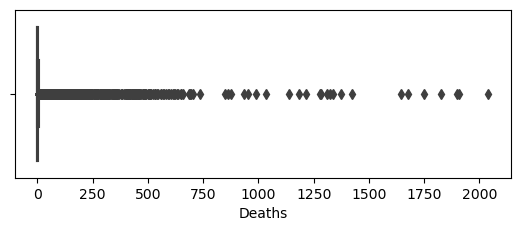

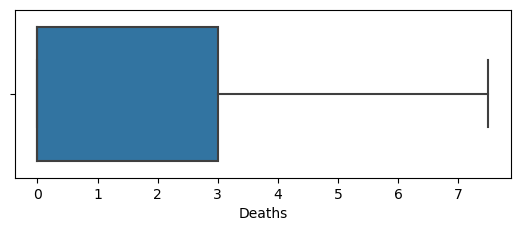

In [406]:
plt.subplot(2,1,1)
sns.boxplot(x=data['Deaths'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['Deaths'].quantile(0.25)
Q3= data['Deaths'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['Deaths'] = np.where(data['Deaths'] > upper_limit, upper_limit,np.where(data['Deaths'] < lower_limit, lower_limit, data['Deaths']))
plt.subplot(2,1,2)
sns.boxplot(x=data['Deaths'])
plt.show()

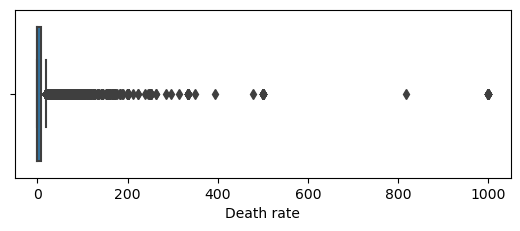

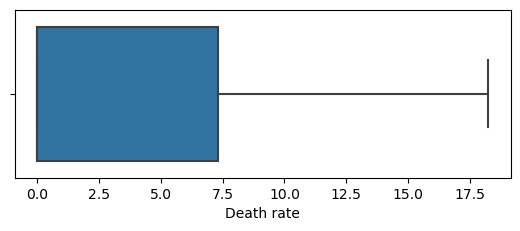

In [407]:
plt.subplot(2,1,1)
sns.boxplot(x=data['Death rate'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['Death rate'].quantile(0.25)
Q3= data['Death rate'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['Death rate'] = np.where(data['Death rate'] > upper_limit, upper_limit,np.where(data['Death rate'] < lower_limit, lower_limit, data['Death rate']))
plt.subplot(2,1,2)
sns.boxplot(x=data['Death rate'])
plt.show()


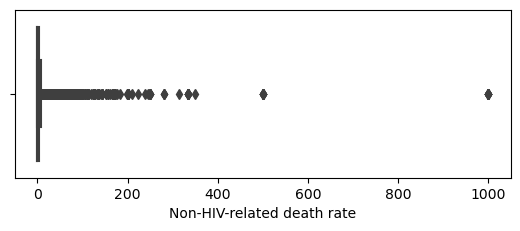

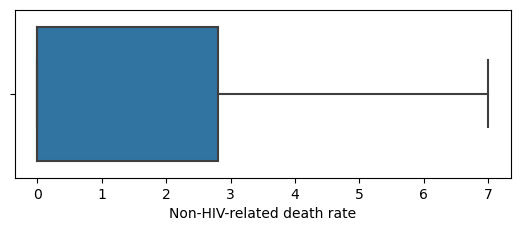

In [408]:
plt.subplot(2,1,1)
sns.boxplot(x=data['Non-HIV-related death rate'])
plt.show()
import pandas as pd
# HIV diagnosesndling outliers by capping
Q1= data['Non-HIV-related death rate'].quantile(0.25)
Q3= data['Non-HIV-related death rate'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 *IQR
data['Non-HIV-related death rate'] = np.where(data['Non-HIV-related death rate'] > upper_limit, upper_limit,np.where(data['Non-HIV-related death rate'] < lower_limit, lower_limit, data['Non-HIV-related death rate']))
plt.subplot(2,1,2)
sns.boxplot(x=data['Non-HIV-related death rate'])
plt.show()


In [409]:
data

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011.0,All,All,All,All,All,10.0,48.30,2.5,1.30,7.5,33.80,1.10,1.3,7.5,13.6,5.8,7.0
1,2011.0,All,All,Male,All,All,10.0,73.00,2.5,1.30,7.5,45.25,1.70,1.3,7.5,13.4,5.7,7.0
2,2011.0,All,All,Female,All,All,10.0,21.10,2.5,1.30,7.5,17.60,0.60,1.3,7.5,14.0,6.0,7.0
3,2011.0,All,All,Transgender,All,All,10.0,32.06,2.5,1.30,7.5,19.12,0.54,1.3,7.5,11.1,5.7,5.4
4,2011.0,All,All,Female,13 - 19,All,10.0,13.60,2.5,1.30,7.5,6.40,0.10,1.3,1.0,1.4,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,Staten Island,Willowbrook,Women,60+,Asian/Pacific Islander,0.0,0.00,0.0,0.80,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0
31921,2021.0,Staten Island,Willowbrook,Women,60+,Black,0.0,0.00,0.0,0.60,0.0,0.00,0.04,1.0,0.0,0.0,0.0,0.0
31922,2021.0,Staten Island,Willowbrook,Women,60+,Latinx/Hispanic,0.0,0.00,0.0,0.71,0.0,0.00,0.70,0.5,0.0,0.0,0.0,0.0
31923,2021.0,Staten Island,Willowbrook,Women,60+,Other/Unknown,0.0,0.00,0.0,0.80,0.0,0.00,0.00,1.0,0.0,0.0,0.0,0.0


## HEAT MAP ANALYSIS:

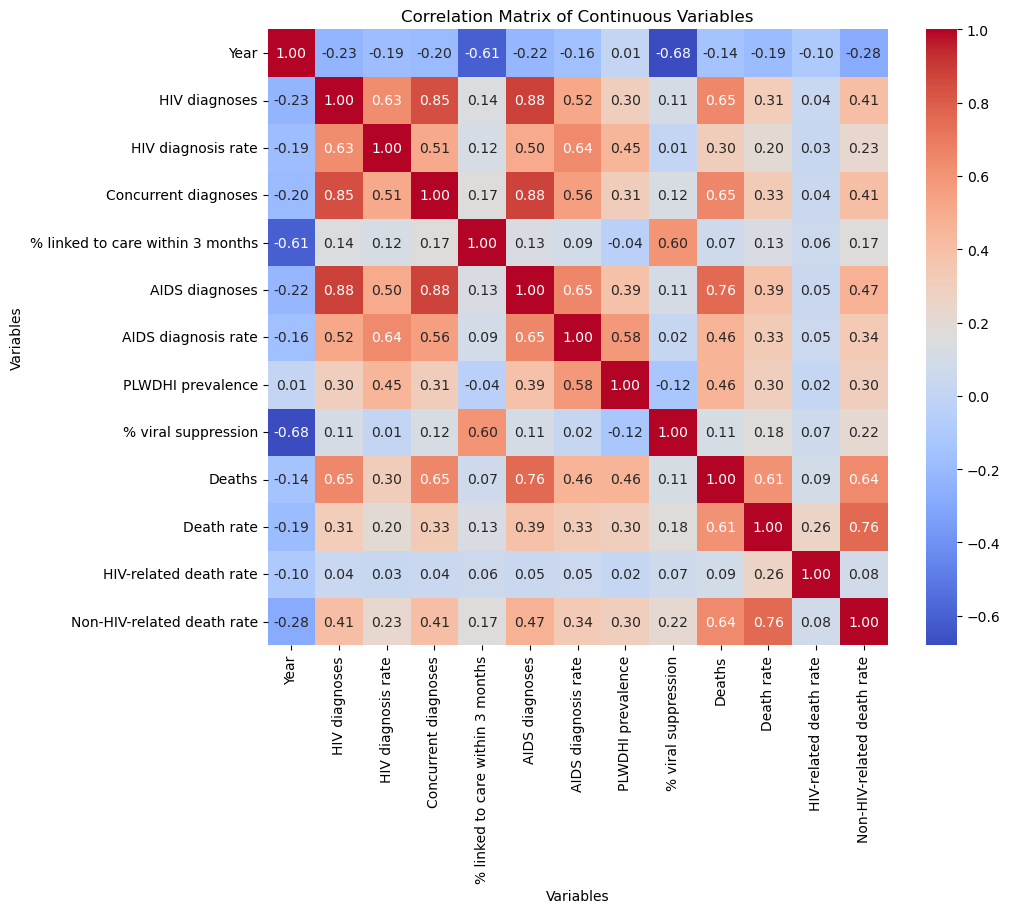

In [410]:
# Selecting only the continuous variables
continuous_data = data.select_dtypes(include=['float64', 'int64'])
# Compute the correlation matrix
correlation_matrix = continuous_data.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

### The skewness of the attributes indicates both positive and negative skewness. Typically, replacing null values with the median would be the best option in such cases. However, since the median value is 0, we will replace the null values with the mean instead.

## Dropping the incompatible rows: 

In [411]:
 data['Borough'] = data['Borough'].replace('All', pd.NA)
data.dropna(inplace=True)
data
 data['Gender'] = data['Gender'].replace('All', pd.NA)
data.dropna(inplace=True)
data
data['UHF'] = data['UHF'].replace('All', pd.NA)
data.dropna(inplace=True)
data
data['Race'] = data['Race'].replace('All', pd.NA)
data.dropna(inplace=True)
data
data['Age'] = data['Age'].replace('All', pd.NA)
data.dropna(inplace=True)


### In this dataset, we are dealing with data representing a particular city within a borough. However, some rows contain information for all cities in the borough. It is better to eliminate these rows, as they may lead to incompatibility when computed with the rows that represent information for a specific city.

In [412]:
data.replace("Men","Male",inplace=True)

data.replace("Women","Female",inplace=True)
data

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
6264,2017.0,Bronx,Crotona - Tremont,Male,18 - 29,Asian/Pacific Islander,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0
6265,2017.0,Bronx,Crotona - Tremont,Male,18 - 29,Black,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0
6266,2017.0,Bronx,Crotona - Tremont,Male,18 - 29,Latinx/Hispanic,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0
6267,2017.0,Bronx,Crotona - Tremont,Male,18 - 29,Other/Unknown,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0
6268,2017.0,Bronx,Crotona - Tremont,Male,18 - 29,White,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,Staten Island,Willowbrook,Female,60+,Asian/Pacific Islander,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0
31921,2021.0,Staten Island,Willowbrook,Female,60+,Black,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0
31922,2021.0,Staten Island,Willowbrook,Female,60+,Latinx/Hispanic,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0
31923,2021.0,Staten Island,Willowbrook,Female,60+,Other/Unknown,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0


## Conversion of categorical columns into numerical columns through LabelEncoder

In [413]:
from sklearn import preprocessing

categorical_columns = ["Borough","Race","Gender","Age"]

label_encoder = preprocessing.LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

display(data)
data.to_csv("processed_encoded_hiv.csv", index=False)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
6264,2017.0,0,Crotona - Tremont,1,0,0,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0
6265,2017.0,0,Crotona - Tremont,1,0,1,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0
6266,2017.0,0,Crotona - Tremont,1,0,2,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0
6267,2017.0,0,Crotona - Tremont,1,0,3,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0
6268,2017.0,0,Crotona - Tremont,1,0,4,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,4,Willowbrook,0,4,0,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0
31921,2021.0,4,Willowbrook,0,4,1,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0
31922,2021.0,4,Willowbrook,0,4,2,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0
31923,2021.0,4,Willowbrook,0,4,3,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0


# Categorical to Numerical Conversion:
## Borough:
###  *'Bronx'=0,
### 'Brooklyn'=1, 
### 'Manhattan'=2, 
### 'Queens'=3,
### 'Staten Island'=4

## Gender:
### Male=0 
### Female=1

## Age:
### *'18 - 29'=0,
### '30 - 39'=1,
### '40 - 49'=2,
### '50 - 59'=3,
### '60+'=4

In [414]:
import pandas as pd

# Assuming data3 is your DataFrame
print(data.columns)

# Alternatively, you can directly check if the column exists before attempting to drop it
if 'UHF' in data.columns:
    data.drop("UHF", axis=1, inplace=True)
else:
    print("Column 'UHF' not found in DataFrame.")



Index(['Year', 'Borough', 'UHF', 'Gender', 'Age', 'Race', 'HIV diagnoses',
       'HIV diagnosis rate', 'Concurrent diagnoses',
       '% linked to care within 3 months', 'AIDS diagnoses',
       'AIDS diagnosis rate', 'PLWDHI prevalence', '% viral suppression',
       'Deaths', 'Death rate', 'HIV-related death rate',
       'Non-HIV-related death rate'],
      dtype='object')


In [415]:
data

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
6264,2017.0,0,1,0,0,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0
6265,2017.0,0,1,0,1,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0
6266,2017.0,0,1,0,2,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0
6267,2017.0,0,1,0,3,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0
6268,2017.0,0,1,0,4,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,4,0,4,0,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0
31921,2021.0,4,0,4,1,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0
31922,2021.0,4,0,4,2,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0
31923,2021.0,4,0,4,3,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0


# UNIVARIATE & BIVARIATE ANALYSIS 

<Axes: xlabel='Gender', ylabel='count'>

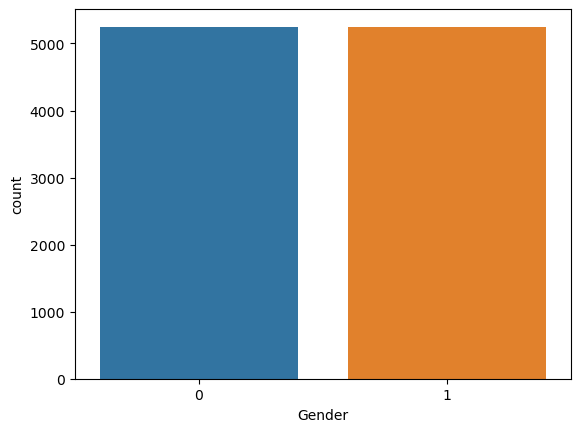

In [416]:
sns.countplot(x='Gender',data=data)

([<matplotlib.patches.Wedge at 0x1ba17d64190>,
 [Text(0.8899186877588753, 0.6465637858537406, '0'),
  Text(-0.3399187231970732, 1.046162158377023, '1'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '2'),
  Text(-0.33991862524830174, -1.0461621902025062, '3'),
  Text(0.8899187482945414, -0.6465637025335375, '4')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.0%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.0%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

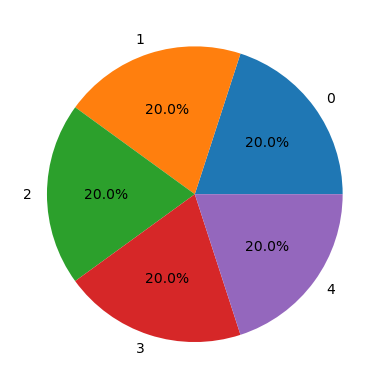

In [417]:
race=data.groupby("Race") 
pi=race["Race"].value_counts() 
p=pi.index  
#p=race["Race"].index 
plt.pie(pi,labels=p,autopct='%1.1f%%')

Text(0, 0.5, 'Number of people diaonised with HIV')

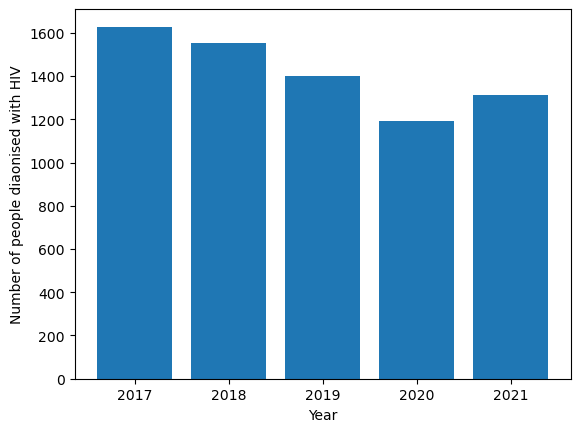

In [418]:
p=data.groupby("Year")
hiv_diag=p["HIV diagnoses"].sum()
plt.bar(hiv_diag.index,hiv_diag)
plt.xlabel("Year")
plt.ylabel("Number of people diaonised with HIV")

([<matplotlib.patches.Wedge at 0x1ba17dd4150>,
 [Text(0.8899186877588753, 0.6465637858537406, '0'),
  Text(-0.3399187231970732, 1.046162158377023, '1'),
  Text(-1.0999999999999988, -5.149471622296949e-08, '2'),
  Text(-0.33991862524830174, -1.0461621902025062, '3'),
  Text(0.8899187482945414, -0.6465637025335375, '4')],
 [Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.18541021265294902, 0.5706339045692853, '20.0%'),
  Text(-0.5999999999999993, -2.808802703071063e-08, '20.0%'),
  Text(-0.1854101592263464, -0.5706339219286397, '20.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

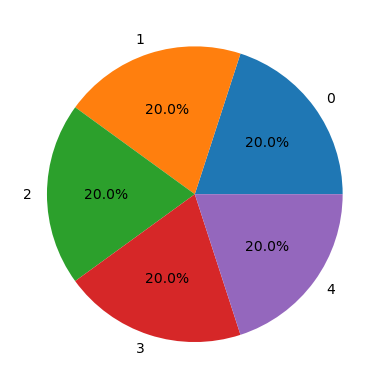

In [419]:
Age=data.groupby("Age") 
pi=Age["Age"].value_counts() 
p=pi.index  
#p=race["Race"].index 
plt.pie(pi,labels=p,autopct='%1.1f%%')

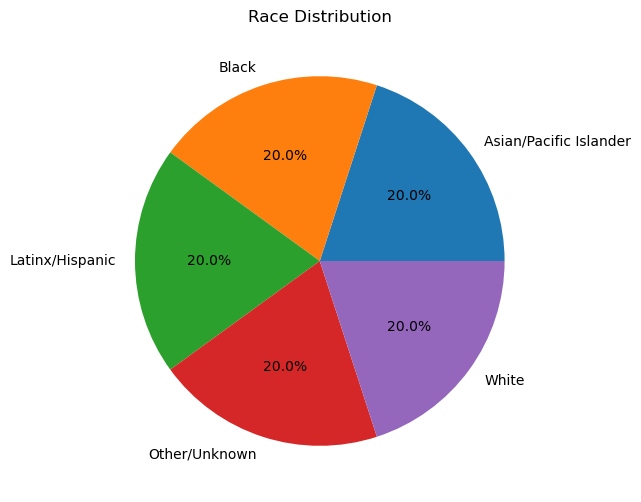

In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


race = data.groupby("Race")
pi = race["Race"].value_counts()
p = pi.index

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(pi, labels=['Asian/Pacific Islander', 'Black', 'Latinx/Hispanic','Other/Unknown', 'White'], autopct='%1.1f%%')
plt.title('Race Distribution')
plt.show()

C:\Users\madan nayak\AppData\Local\Temp\ipykernel_2296\2947672102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["HIV diagnoses"],bins=20,kde=False)


<Axes: xlabel='HIV diagnoses'>

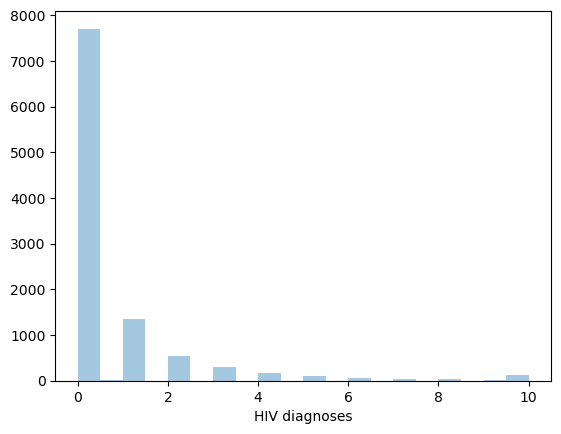

In [421]:
sns.distplot(data["HIV diagnoses"],bins=20,kde=False)

C:\Users\madan nayak\AppData\Local\Temp\ipykernel_2296\72564291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AIDS diagnoses"],bins=20,kde=False)


<Axes: xlabel='AIDS diagnoses'>

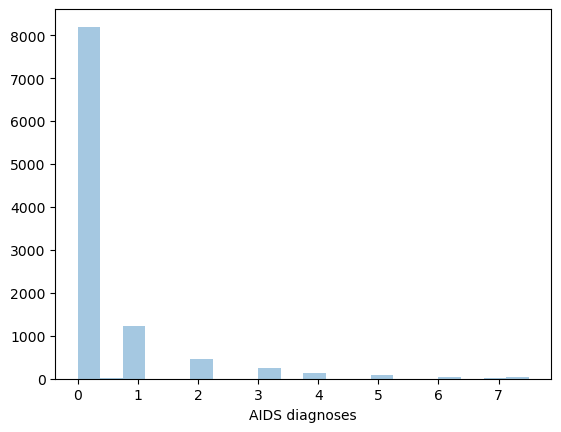

In [422]:
sns.distplot(data["AIDS diagnoses"],bins=20,kde=False)

C:\Users\madan nayak\AppData\Local\Temp\ipykernel_2296\835105179.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Concurrent diagnoses"],bins=20,kde=False)


<Axes: xlabel='Concurrent diagnoses'>

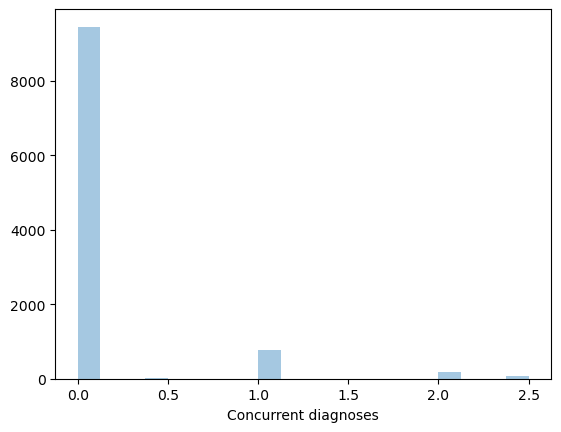

In [423]:
sns.distplot(data["Concurrent diagnoses"],bins=20,kde=False)

#                                        HYPOTHESIS:

## 1. CITY WISE ANALYSIS OF HIV / AIDS DIAGNOSES.

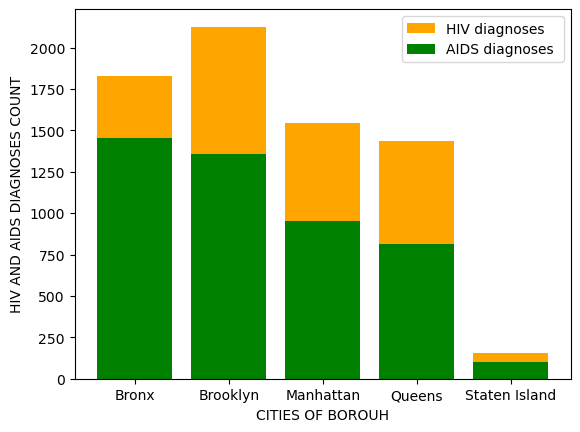

In [424]:
p=data.groupby("Borough")
hd=p["HIV diagnoses"].sum()
ad=p["AIDS diagnoses"].sum()
label=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.bar(label,hd,color="orange",label="HIV diagnoses")
plt.bar(label,ad,color="green",label="AIDS diagnoses ")
plt.xlabel("CITIES OF BOROUH")
plt.ylabel("HIV AND AIDS DIAGNOSES COUNT")
plt.legend()

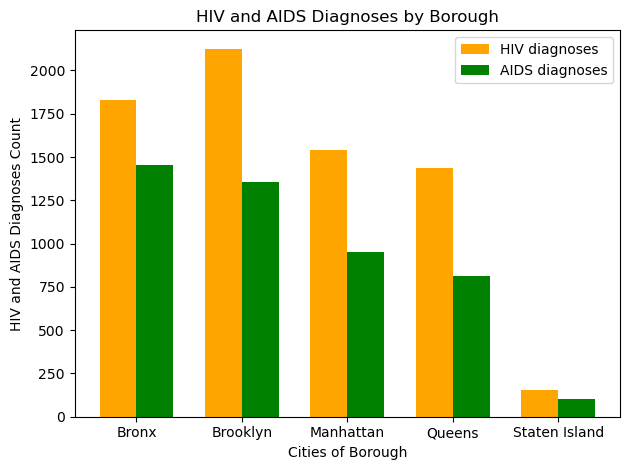

In [425]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is the DataFrame containing the dataset
p = data.groupby("Borough")
hd = p["HIV diagnoses"].sum()
ad = p["AIDS diagnoses"].sum()
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

x = range(len(label))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, hd, width, label='HIV diagnoses', color='orange')
rects2 = ax.bar([i + width for i in x], ad, width, label='AIDS diagnoses', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Cities of Borough')
ax.set_ylabel('HIV and AIDS Diagnoses Count')
ax.set_title('HIV and AIDS Diagnoses by Borough')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()


### CONCLUSION: We can observe that brooklyn has recorded the highest HIV diagnoses & Staten island has recorded the list ,This could be because of improved medical facilities in Brooklyn

## 2.ANALYSIS OF HIV  & CONCURRENT DIAGNOSES WITH YEAR

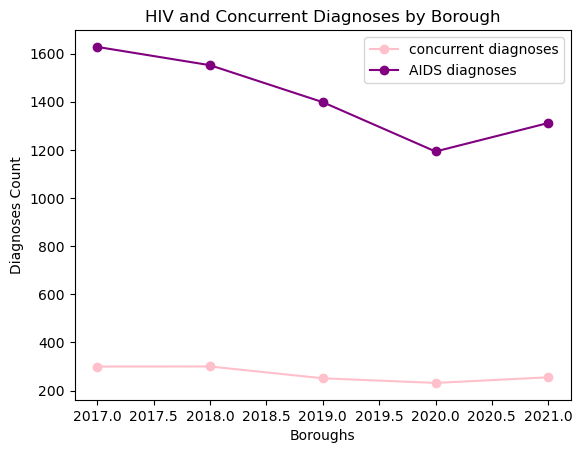

In [426]:
p=data.groupby("Year")

g=p["Concurrent diagnoses"].sum()
h=p["HIV diagnoses"].sum()
label =[2017, 2018, 2019, 2020,2021]
plt.plot(label,g, color="pink", marker='o', linestyle='-', label="concurrent diagnoses")
plt.plot(label,h, color="purple", marker='o', linestyle='-', label="AIDS diagnoses")

# Add labels and title
plt.xlabel("Boroughs")
plt.ylabel("Diagnoses Count")
plt.title("HIV and Concurrent Diagnoses by Borough")

# Add legend
plt.legend()

# Show plot
plt.show()

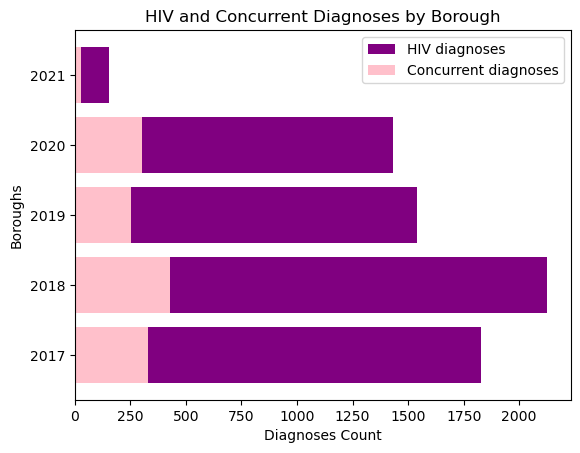

In [427]:
p = data.groupby("Borough")
g = p["Concurrent diagnoses"].sum()
h = p["HIV diagnoses"].sum()
label =[2017, 2018, 2019, 2020,2021]
plt.barh(label, h, color="purple", label="HIV diagnoses")
plt.barh(label, g, color="pink", label="Concurrent diagnoses")

# Add labels and title
plt.xlabel("Diagnoses Count")
plt.ylabel("Boroughs")
plt.title("HIV and Concurrent Diagnoses by Borough")

# Add legend
plt.legend()

# Show plot
plt.show()


### CONCLUSION: We Can Observe from 2018 to 2021 HIV diagnoses rate gradually decreases and compared to HIV Diagnoses Concurrent Diagnoses count is negligible

# 3.AGE WISE ANALYSIS OF HIV DIAGNOSES AND DEATHS.


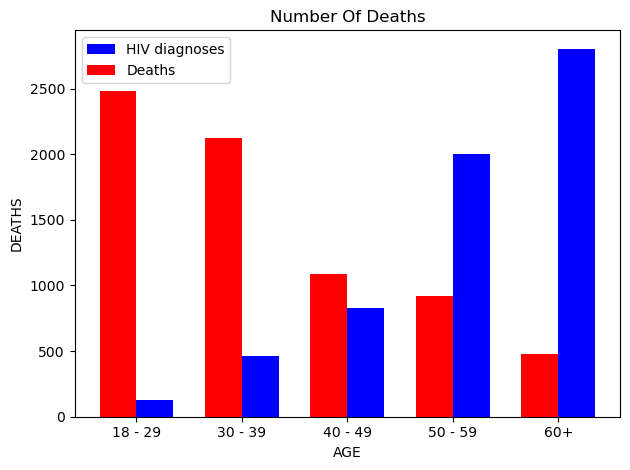

In [428]:
p=data.groupby("Age")
g=p["HIV diagnoses"].sum()
h=p["Deaths"].sum()


label =['18 - 29','30 - 39','40 - 49','50 - 59','60+']
x = range(len(label))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar([i + width for i in x], h, width, label='HIV diagnoses', color='blue')
rects1 = ax.bar(x, g, width, label='Deaths', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('AGE')
ax.set_ylabel('DEATHS')
ax.set_title('Number Of Deaths')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()


### Conclusion: We can see the increasing trend in HIV diagnoses for age groups from 18-29 to 60+.whereas decreasing trend in deaths from age 18-29 to 60+.the reason is due to the less immune system in individuals.

## 4. City Wise Analysis of  Death rate v/s non_hiv death rate.

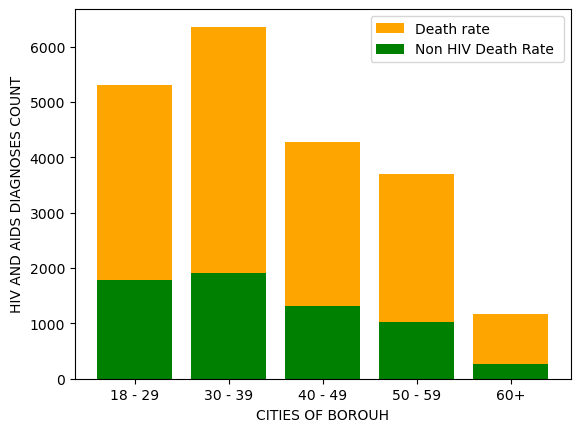

In [429]:
p=data.groupby("Borough") 
hd=p["Death rate"].sum()
ad=p["Non-HIV-related death rate"].sum()
label =['18 - 29','30 - 39','40 - 49','50 - 59','60+']
plt.bar(label,hd,color="orange",label="Death rate")
plt.bar(label,ad,color="green",label="Non HIV Death Rate ")
plt.xlabel("CITIES OF BOROUH")
plt.ylabel("HIV AND AIDS DIAGNOSES COUNT")
plt.legend()

### Conclusion: In age group 30-39 both HIV & NON-HIV related death rate is high due to disease progression. whereas in 60+ it's the lowest reflects improved healthcare management, stable routines.

# 5.Determination of Age and year wise analyses of Hiv diagnoses.

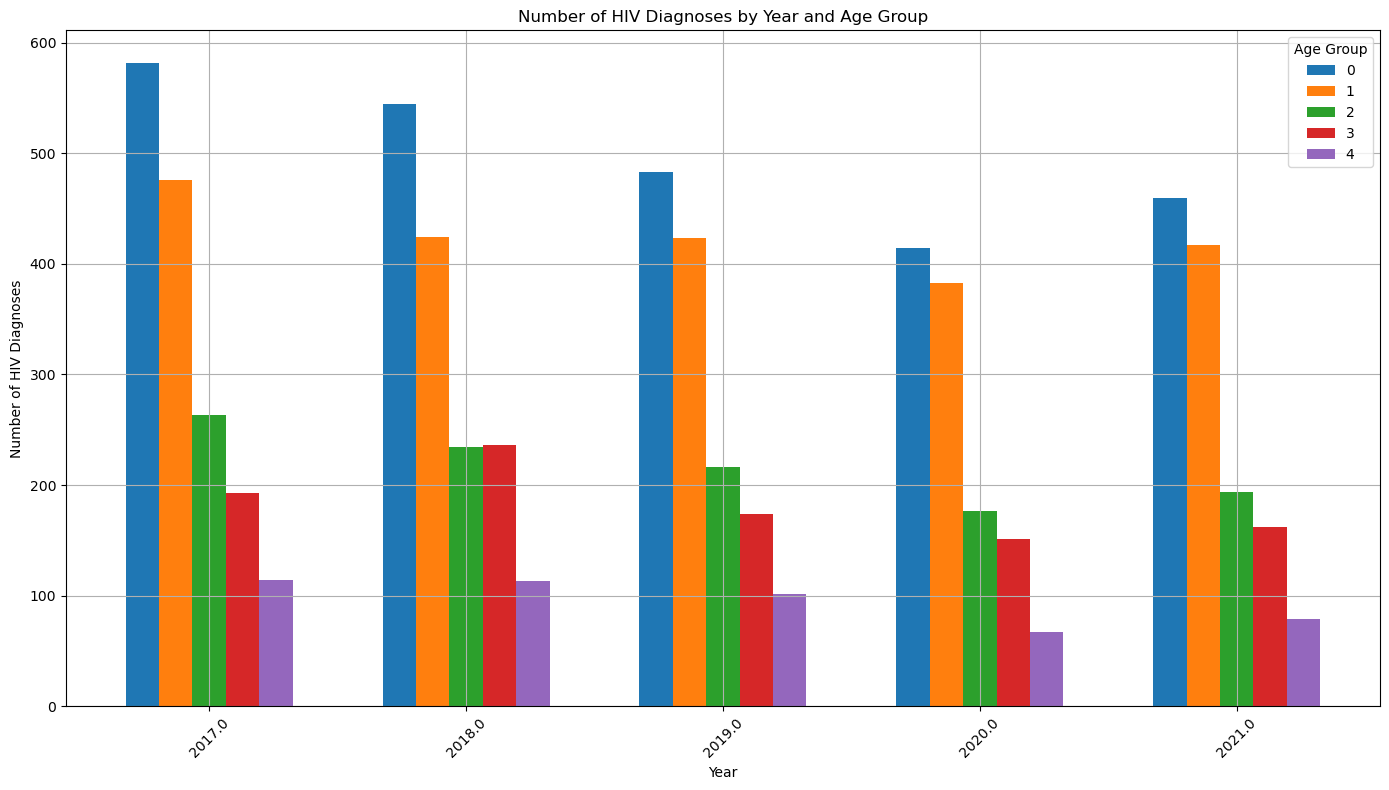

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
data['age_group'] = data['Age']


year_age_grouped = data.groupby(['Year', 'age_group'])['HIV diagnoses'].sum().reset_index()


pivot_data = year_age_grouped.pivot(index='Year', columns='age_group', values='HIV diagnoses')


plt.figure(figsize=(14, 8))


bar_width = 0.13
years = pivot_data.index
n_age_groups = len(pivot_data.columns)


for i, age_group in enumerate(pivot_data.columns):
    plt.bar(years + i * bar_width, pivot_data[age_group], width=bar_width, label=age_group)


plt.xticks(years + bar_width * (n_age_groups - 1) / 2, years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Number of HIV Diagnoses')
plt.title('Number of HIV Diagnoses by Year and Age Group')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion: It concludes that each year, the age group 18-29 has recorded the highest rate of HIV diagnoses, while the 60+ age group has recorded the lowest.

In [431]:
data

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,age_group
6264,2017.0,0,1,0,0,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0,0
6265,2017.0,0,1,0,1,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0,0
6266,2017.0,0,1,0,2,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0,0
6267,2017.0,0,1,0,3,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0,0
6268,2017.0,0,1,0,4,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,4,0,4,0,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4
31921,2021.0,4,0,4,1,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0,4
31922,2021.0,4,0,4,2,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0,4
31923,2021.0,4,0,4,3,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4


# 6.ANALYSIS OF HIV / AIDS DIAGNOSES WITH PLWDHI PREVALENCE.

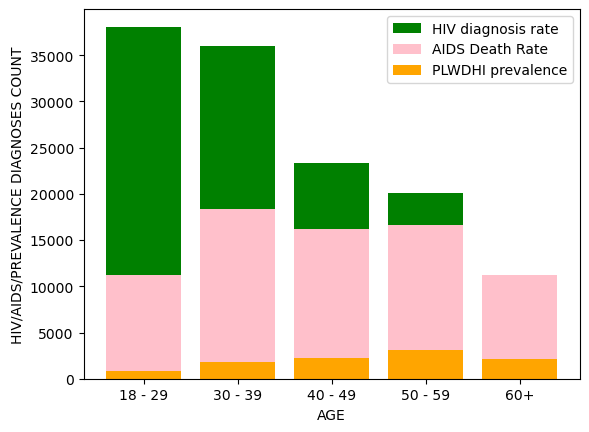

In [432]:
p=data.groupby("Age")
g=p["PLWDHI prevalence"].sum()
hd=p["HIV diagnosis rate"].sum()
j=p["AIDS diagnosis rate"].sum()
ad=p["Non-HIV-related death rate"].sum()
label =['18 - 29','30 - 39','40 - 49','50 - 59','60+']

plt.bar(label,hd,color="green",label="HIV diagnosis rate ")
plt.bar(label,j,color="pink",label="AIDS Death Rate ")
plt.bar(label,g,color="orange",label="PLWDHI prevalence")
plt.xlabel("AGE")
plt.ylabel("HIV/AIDS/PREVALENCE DIAGNOSES COUNT")
plt.legend()

### Conclusion: From the above stacked bar chart we can see younger adults(18-29) have the highest diagnosis rates indicating targeted prevention and education for these age groups.PLWDHI remains high across all age groups understanding importance of sustained medical care.AIDS death rate appears to be stable across all age groups but its lower in 60+ indicating advancement in treatment.

# 7.Determination of Gender wise analysis of HIV Diagnoses.

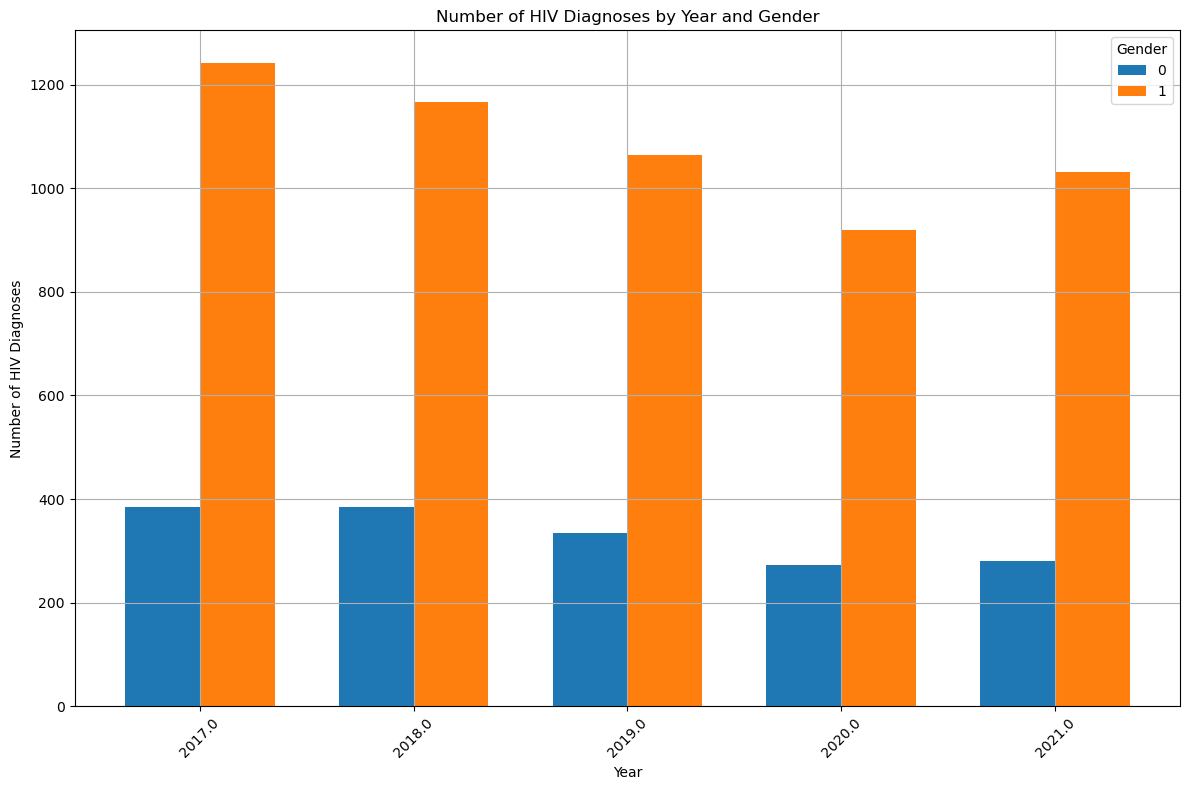

In [433]:
import pandas as pd
import matplotlib.pyplot as plt


year_gender_grouped = data.groupby(['Year', 'Gender'])['HIV diagnoses'].sum().reset_index()

pivot_data = year_gender_grouped.pivot(index='Year', columns='Gender', values='HIV diagnoses')

plt.figure(figsize=(12, 8))

bar_width = 0.35
years = pivot_data.index

for i, gender in enumerate(pivot_data.columns):
    plt.bar(years + i * bar_width, pivot_data[gender], width=bar_width, label=gender)


plt.xticks(years + bar_width / 2, years, rotation=45)

plt.xlabel('Year')
plt.ylabel('Number of HIV Diagnoses')
plt.title('Number of HIV Diagnoses by Year and Gender')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion: It concludes that every year women recordes the highest HIV diagnoses rate rather then the man in 2017 Female has been recorded the most hiv diagnoses   and  least in 2020

# 8. AGE WISE ANALYSIS OF PLWDI PREVALENCE WITH DEATH RATE.


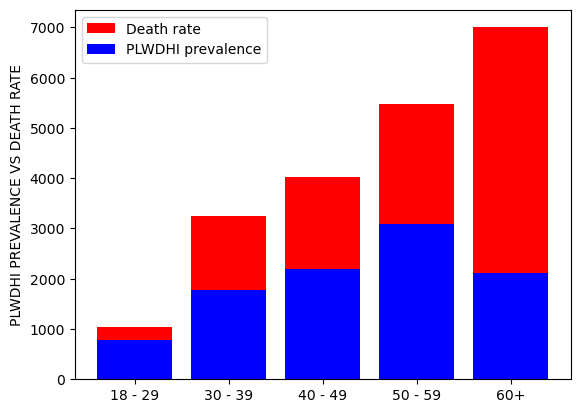

In [434]:
p=data.groupby("Age")
g=p["PLWDHI prevalence"].sum()
hd=p["Death rate"].sum()
label =['18 - 29','30 - 39','40 - 49','50 - 59','60+']
plt.bar(label,hd,color="RED",label="Death rate")
plt.bar(label,g,color="BLUE",label="PLWDHI prevalence")
plt.ylabel("PLWDHI PREVALENCE VS DEATH RATE")
plt.legend()

### Conclusion: Lower PLWDHI prevelence and death rates in age group (18-29) suggest early and effective intervention could reduce HIV infections and death.age group (30-49) is having increasing trends indicating targeted healthcare and testing.The highest prevalence and death rates in these groups signifies the critical need for comprehensive healthcare strategies.

# 9.CITY WISE ANALYSIS OF AIDS DIAGNOSES AND DEATH RATE. 


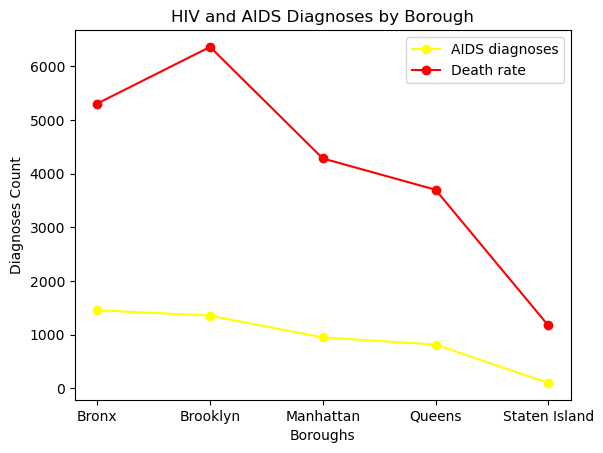

In [435]:
p=data.groupby("Borough")
g=p["AIDS diagnoses"].sum()
h=p["Death rate"].sum()
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.plot(label, g, color="yellow", marker='o', linestyle='-', label="AIDS diagnoses")
plt.plot(label, h, color="red", marker='o', linestyle='-', label="Death rate")
# Add labels and title
plt.xlabel("Boroughs")
plt.ylabel("Diagnoses Count")
plt.title("HIV and AIDS Diagnoses by Borough")
# Add legend
plt.legend()

# Show plot
plt.show()

### Conclusion: Brooklyn and Bronx have the highest death rate, indicates need for focused health care.Staten Island has the lowest number of AIDS diagnoses suggesting a lower prevalence or better management of HIV.there is decreasing trend from Manhattan to Staten Island.

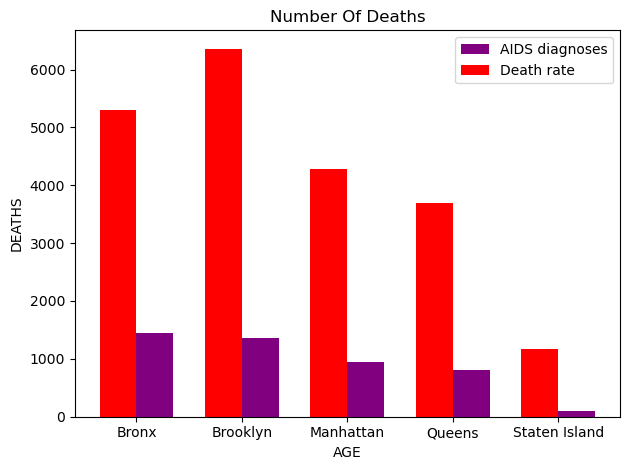

In [436]:
p=data.groupby("Borough")
g=p["AIDS diagnoses"].sum()
h=p["Death rate"].sum()
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
x = range(len(label))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar([i + width for i in x], g, width, label='AIDS diagnoses', color='purple')
rects1 = ax.bar(x, h, width, label='Death rate', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('AGE')
ax.set_ylabel('DEATHS')
ax.set_title('Number Of Deaths')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()

### Conclusion: Brooklyn has the highest death rate and Staten Island lowest.Brooklyn and Bronx have the highest number of AIDS diagnoses while Staten Island has the lowest.higher death rates in areas indicated public healthcare to be addressed.

# 10.CITY WISE ANALYSIS OF CONCURRENT & AIDSDIAGNOSIS.
 

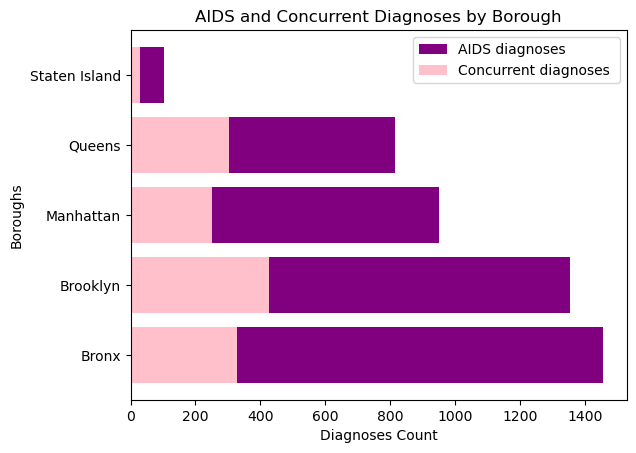

In [437]:
p = data.groupby("Borough")
g = p["Concurrent diagnoses"].sum()
h = p["AIDS diagnoses"].sum()
#plt.xticks(label)
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.barh(label, h, color="purple", label="AIDS diagnoses")
plt.barh(label, g, color="pink", label="Concurrent diagnoses ")


# Add labels and title
plt.xlabel("Diagnoses Count")
plt.ylabel("Boroughs")
plt.title("AIDS and Concurrent Diagnoses by Borough")

# Add legend
plt.legend()

# Show plot
plt.show()


### Conclusion: Bronx is having the highest AIDS diagnoses count require effective to address specific healthcare needs, while Staten Island lowest.concurrent diagnoses count is higher in brooklyn compared to others while Staten Island having the lowest. 

# 11.RACE WISE ANALYSIS HIV DIAGNOSES WITH DEATH RATE.


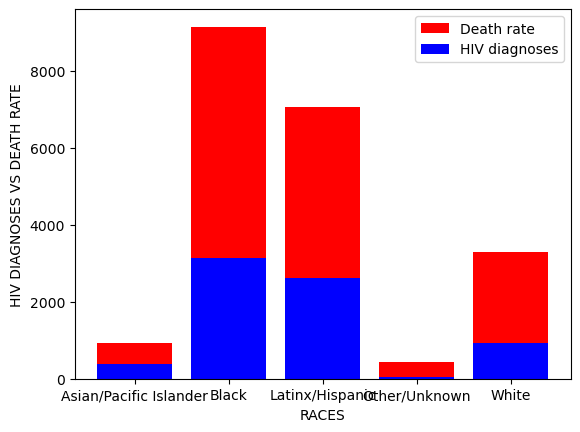

In [438]:
p=data.groupby("Race")
# Example data
label = ['Asian/Pacific Islander', 'Black', 'Latinx/Hispanic','Other/Unknown', 'White']
g = p["Death rate"].sum()
h = p["HIV diagnoses"].sum()
plt.bar(label,g,color="RED",label="Death rate")
plt.bar(label,h,color="BLUE",label="HIV diagnoses")
plt.ylabel("HIV DIAGNOSES VS DEATH RATE")
plt.xlabel("RACES")
plt.legend()

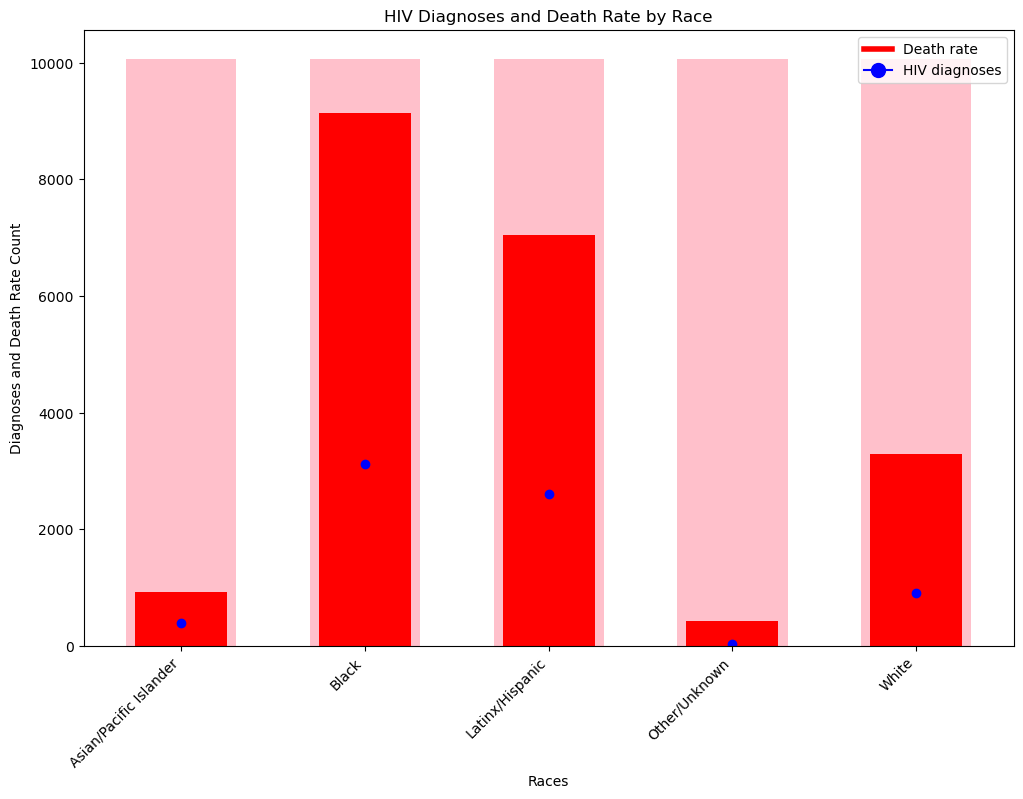

In [439]:
import matplotlib.pyplot as plt

# Example data
label = ['Asian/Pacific Islander', 'Black', 'Latinx/Hispanic', 'Other/Unknown', 'White']
# Assuming p is already grouped and summed
death_rate = p["Death rate"].sum()
hiv_diagnoses = p["HIV diagnoses"].sum()

# Plotting the bullet chart
fig, ax = plt.subplots(figsize=(12, 8))

# Loop over each race and create the bullet chart components
for i, race in enumerate(label):
    # Plot the qualitative ranges (optional)
    ax.bar(i, max(death_rate.max(), hiv_diagnoses.max()) * 1.1, color='pink', width=0.6)  # Background range
    ax.bar(i, death_rate[i], color='red', width=0.5)  # Death rate bar
    ax.plot(i, hiv_diagnoses[i], 'o', color='blue')  # HIV diagnoses marker

# Set the labels and title
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label, rotation=45, ha='right')
ax.set_ylabel("Diagnoses and Death Rate Count")
ax.set_xlabel("Races")
ax.set_title("HIV Diagnoses and Death Rate by Race")

# Add legend
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Death rate')
blue_patch = plt.Line2D([0], [0], marker='o', color='blue', markersize=10, label='HIV diagnoses')
ax.legend(handles=[red_patch, blue_patch])

# Show plot
plt.show()


### Conclusion: People with Black races have the highest count of HIV diagnosis and death rate. while Asian/Pacific and others having the lowest.there is no direct correlation between skin color and hiv risk but socioeconomic factors, including limited access to healthcare, higher poverty rates, stigma can affect.¶

### 12. AGE WISE ANALYSIS OF AIDS / HIV / CONCURRENT DIAGNOSES.

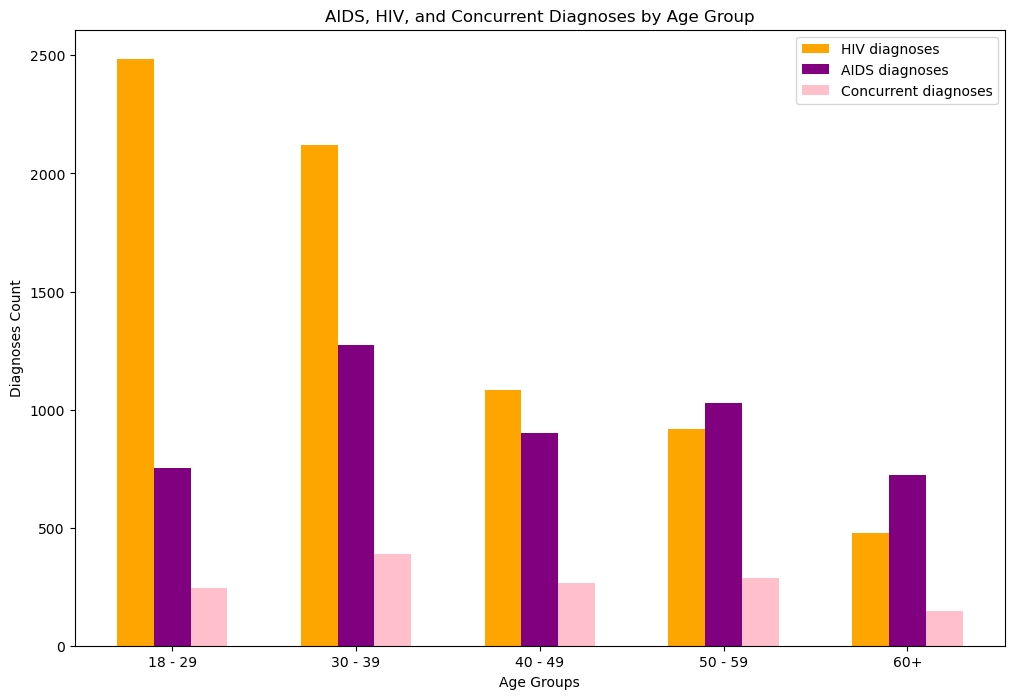

In [440]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
p=data.groupby("Age")
# Assuming p is already grouped and summed
concurrent_diagnoses = p["Concurrent diagnoses"].sum()
aids_diagnoses = p["AIDS diagnoses"].sum()
hiv_diagnoses = p["HIV diagnoses"].sum()

# Define the position of the bars on the x-axis
x = np.arange(len(label))

# Define the width of the bars
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each set of bars
rects1 = ax.bar(x - width, hiv_diagnoses, width, label='HIV diagnoses', color='orange')
rects2 = ax.bar(x, aids_diagnoses, width, label='AIDS diagnoses', color='purple')
rects3 = ax.bar(x + width, concurrent_diagnoses, width, label='Concurrent diagnoses', color='pink')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Diagnoses Count')
ax.set_xlabel('Age Groups')
ax.set_title('AIDS, HIV, and Concurrent Diagnoses by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Display the chart
plt.show()


### Conclusion: From the above grouped bar chart we can see 18-29 age group is having the highest HIV diagnoses count further we can see decreasing trend in other age groups.trend in AIDS diagnoses and Concurrent diagnoses count is stable in all groups.age group 30-39 have undiagnosed HIV cases now progressing to AIDS and being detected other health conditions need to focus on prevention and medical treatment.

# 13.YEAR WISE ANALYSIS OF CONCURRENT / AIDS DIAGNOSES .  


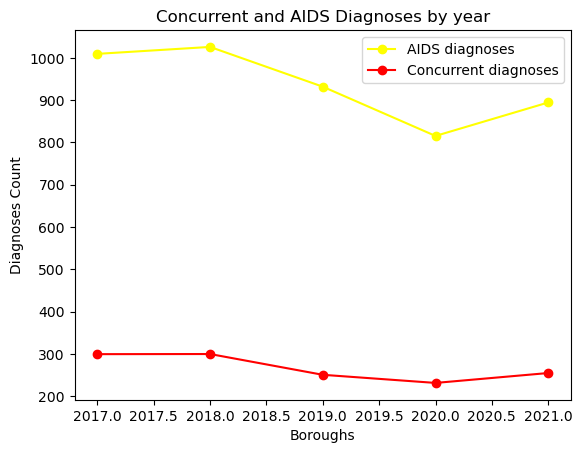

In [441]:
p=data.groupby("Year")
g=p["AIDS diagnoses"].sum()
h=p["Concurrent diagnoses"].sum()
label=[2017, 2018, 2019, 2020,2021]
plt.plot(label, g, color="yellow", marker='o', linestyle='-', label="AIDS diagnoses")
plt.plot(label, h, color="red", marker='o', linestyle='-', label="Concurrent diagnoses")
# Add labels and title
plt.xlabel("Boroughs")
plt.ylabel("Diagnoses Count")
plt.title("Concurrent and AIDS Diagnoses by year")
# Add legend
plt.legend()

# Show plot
plt.show()

Conclusion: The trend for concurrent diagnoses count is decreasing over the years from 300 to 200 signifies early detection of HIV and timely intervention reducing likelihood of concurrent diagnoses.But the AIDS count trend is first decreasing then again increasing need for prevention efforts.

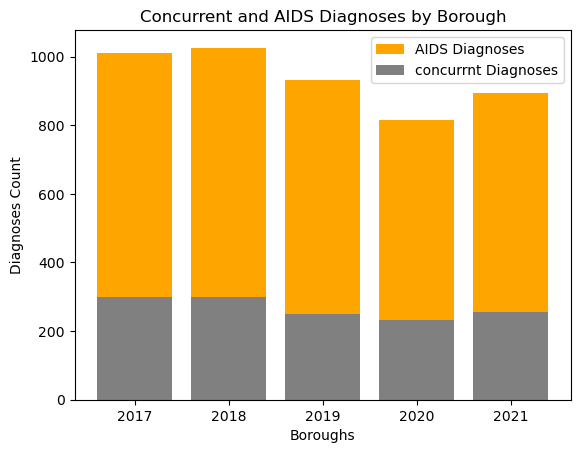

In [442]:
p=data.groupby("Year")
g=p["AIDS diagnoses"].sum()
h=p["Concurrent diagnoses"].sum()
label=[2017, 2018, 2019, 2020,2021]
plt.bar(label,g,color="orange",label="AIDS Diagnoses")
plt.bar(label,h,color="grey",label="concurrnt Diagnoses")
plt.xlabel("Boroughs")
plt.ylabel("Diagnoses Count")
plt.title("Concurrent and AIDS Diagnoses by Borough")
# Add legend
plt.legend()

# Show plot
plt.show()

Conclusion: from 2017 to 2021 both AIDS diagnoses and Concurrent diagnoses trends are almost at same level(high).but in 2020 we can see drop this may be due to impact of COVID-19 pendamic on reduced healthcare routine services.

# 14. Analysis of AIDS diagnoses with HIV related death rate by borough


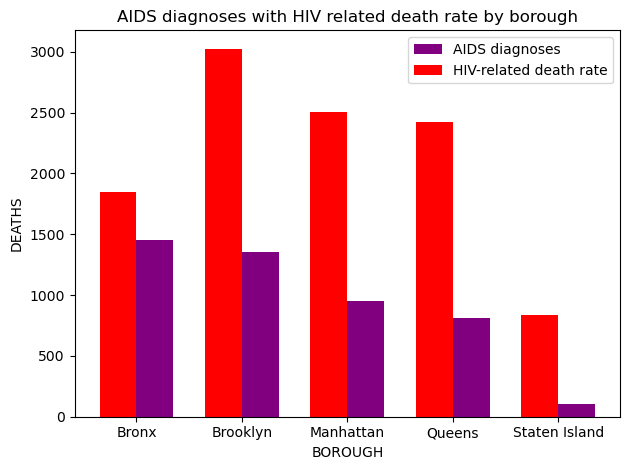

In [443]:
p=data.groupby("Borough")
g=p["AIDS diagnoses"].sum()
h=p["HIV-related death rate"].sum()
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
x = range(len(label))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar([i + width for i in x], g, width, label='AIDS diagnoses', color='purple')
rects1 = ax.bar(x, h, width, label='HIV-related death rate', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('BOROUGH')
ax.set_ylabel('DEATHS')
ax.set_title('AIDS diagnoses with HIV related death rate by borough')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()

### Conclusion: The highest rate of HIV-related deaths in Brooklyn and the highest rates of AIDS diagnoses in the Bronx and Brooklyn can be ascribed to a confluence of demographic characteristics, healthcare accessibility, and population density. The smaller population and perhaps distinct demographic and socioeconomic background of Staten Island are reflected in the lower rates.

# 15.%viral suppression with HIV-related & non-hiv-related death rate by year 


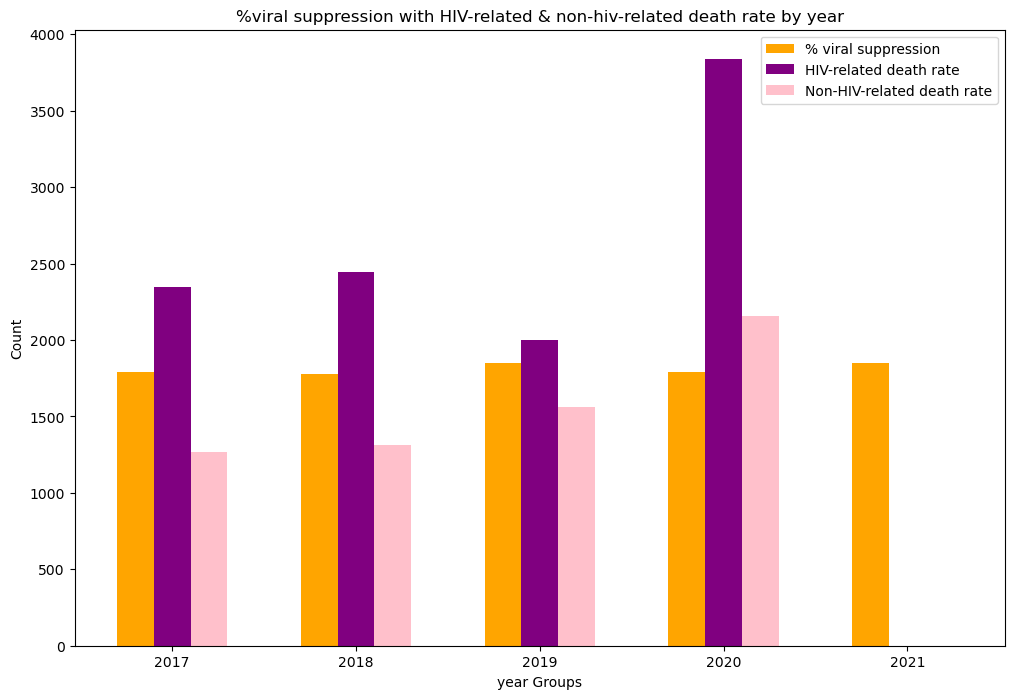

In [444]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
label=[2017, 2018, 2019, 2020,2021]
p=data.groupby("Year")
# Assuming p is already grouped and summed
l= p["% viral suppression"].sum()
m = p["HIV-related death rate"].sum()
n = p["Non-HIV-related death rate"].sum()

# Define the position of the bars on the x-axis
x = np.arange(len(label))

# Define the width of the bars
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each set of bars
rects1 = ax.bar(x - width, l, width, label='% viral suppression', color='orange')
rects2 = ax.bar(x, m, width, label='HIV-related death rate', color='purple')
rects3 = ax.bar(x + width, n, width, label='Non-HIV-related death rate', color='pink')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('year Groups')
ax.set_title('%viral suppression with HIV-related & non-hiv-related death rate by year')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Display the chart
plt.show()


### Conclusion: From above graph we can see from 2017 to 2019 viral suppression rates are stable imply that over these years, continuous and successful efforts were made to treat HIV and manage the infection.while in HIV & NON-HIV -related death rate we can see increasing trend.

# 16. Analysis of %linked to within 3 months with HIV Diagnoses.


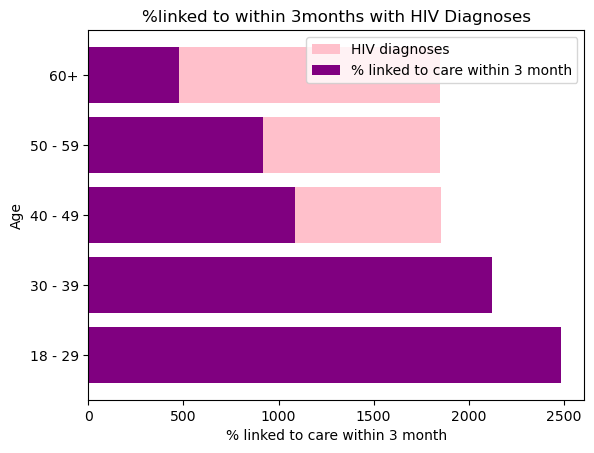

In [445]:
p = data.groupby("Age")
g = p["% linked to care within 3 months"].sum()
h = p["HIV diagnoses"].sum()
#plt.xticks(label)
label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

plt.barh(label, g, color="pink", label="HIV diagnoses")
plt.barh(label, h, color="purple", label="% linked to care within 3 month")
# Add labels and title
plt.xlabel("% linked to care within 3 month")
plt.ylabel("Age")
plt.title("%linked to within 3months with HIV Diagnoses")

# Add legend
plt.legend()

# Show plot
plt.show()


### Conclusion: Since a large proportion of people with HIV are linked to care within three months, the entire bar for this 18-29 age group is purple.For this age range, no HIV diagnoses have been documented.HIV preventive programs implemented successfully.

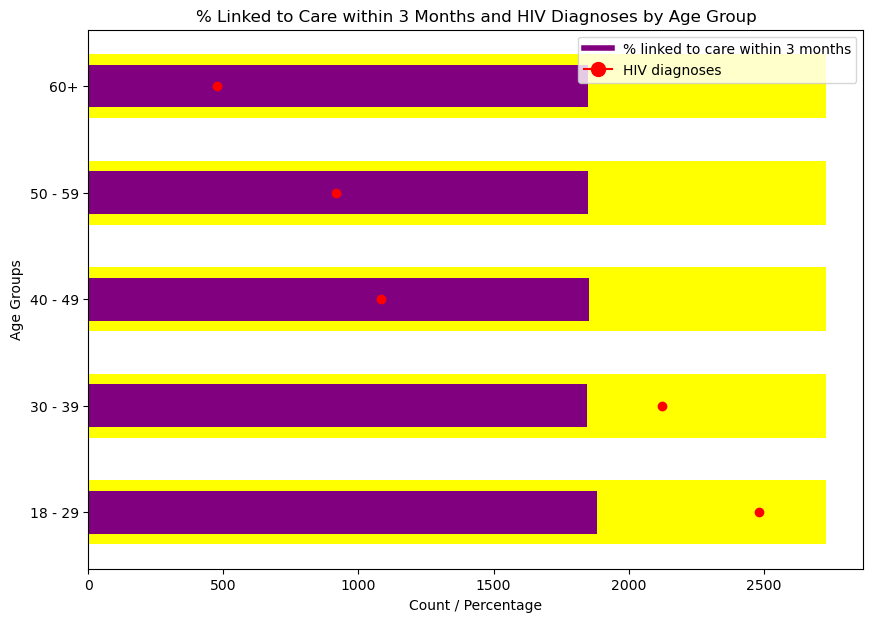

In [446]:
import matplotlib.pyplot as plt

# Assuming data is already grouped and summed as per the user's script
p = data.groupby("Age")
linked_to_care = p["% linked to care within 3 months"].sum()
hiv_diagnoses = p["HIV diagnoses"].sum()

label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

# Plotting the bullet chart
fig, ax = plt.subplots(figsize=(10, 7))

# Loop over each age group and create the bullet chart components
for i, age_group in enumerate(label):
    # Plot the qualitative ranges (optional)
    ax.barh(i, max(linked_to_care.max(), hiv_diagnoses.max()) * 1.1, color='yellow', height=0.6)  # Background range
    ax.barh(i, linked_to_care[i], color='purple', height=0.4)  # % linked to care bar
    ax.plot(hiv_diagnoses[i], i, 'o', color='red')  # HIV diagnoses marker

# Set the labels and title
ax.set_yticks(range(len(label)))
ax.set_yticklabels(label)
ax.set_xlabel("Count / Percentage")
ax.set_ylabel("Age Groups")
ax.set_title("% Linked to Care within 3 Months and HIV Diagnoses by Age Group")

# Add legend
purple_patch = plt.Line2D([0], [0], color='purple', lw=4, label='% linked to care within 3 months')
pink_patch = plt.Line2D([0], [0], marker='o', color='red', markersize=10, label='HIV diagnoses')
ax.legend(handles=[purple_patch, pink_patch])

# Show plot
plt.show()


# 17.Death rate ,HIV-related death rate , Non-hiv related death rate by borough.


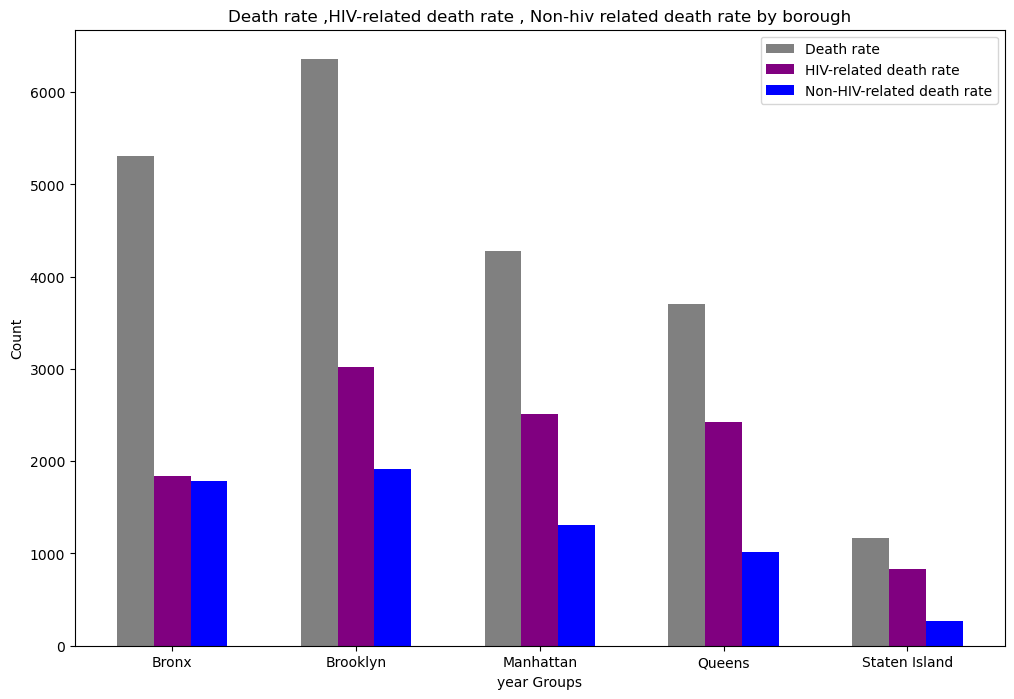

In [447]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
p=data.groupby("Borough")
# Assuming p is already grouped and summed
l= p["Death rate"].sum()
m = p["HIV-related death rate"].sum()
n = p["Non-HIV-related death rate"].sum()

# Define the position of the bars on the x-axis
x = np.arange(len(label))

# Define the width of the bars
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each set of bars
rects1 = ax.bar(x - width, l, width, label='Death rate', color='grey')
rects2 = ax.bar(x, m, width, label='HIV-related death rate', color='purple')
rects3 = ax.bar(x + width, n, width, label='Non-HIV-related death rate', color='blue')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('year Groups')
ax.set_title('Death rate ,HIV-related death rate , Non-hiv related death rate by borough')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Display the chart
plt.show()


### Conclusion: From the above graph we can see the general mortality trend in each borough.Higher rates of both HIV-related and non-HIV-related mortality in Brooklyn are a result of increased population density, socioeconomic difficulties, and differences in healthcare access.
### decreased death rates in both categories in Staten Island can be attributed to factors such as greater healthcare access, socioeconomic conditions, and decreased population density.

# 18. Year wise analysis of  %linked to within 3 months & %viral suppression with year.

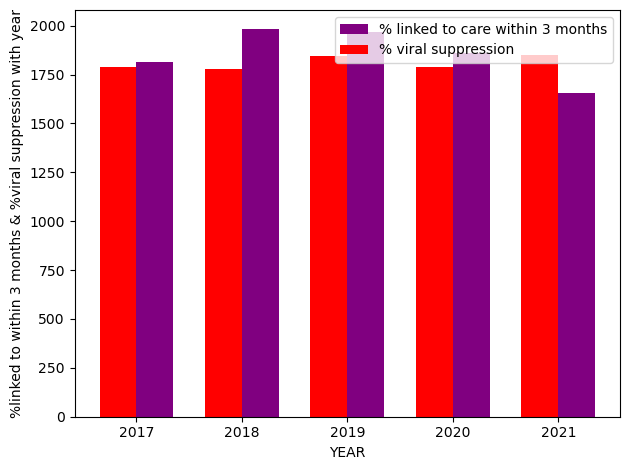

In [448]:
p=data.groupby("Year")
g=p["% linked to care within 3 months"].sum()
h=p["% viral suppression"].sum()
label=[2017, 2018, 2019, 2020,2021]


x = range(len(label))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar([i + width for i in x], g, width, label='% linked to care within 3 months', color='purple')
rects1 = ax.bar(x, h, width, label='% viral suppression', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('YEAR')
ax.set_ylabel('RATE')
ax.set_ylabel("%linked to within 3 months & %viral suppression with year")
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(label)
ax.legend()

fig.tight_layout()

plt.show()

### Conclusion: over the years The consistent trend in "% linked to care within 3 months" and "% viral suppression" demonstrates favorable outcomes in HIV management and emphasizes the significance of continued support and resources for comprehensive HIV treatment and prevention initiatives.

# 19.Analysis of HIV Diagnoses with PLWDHI by age 


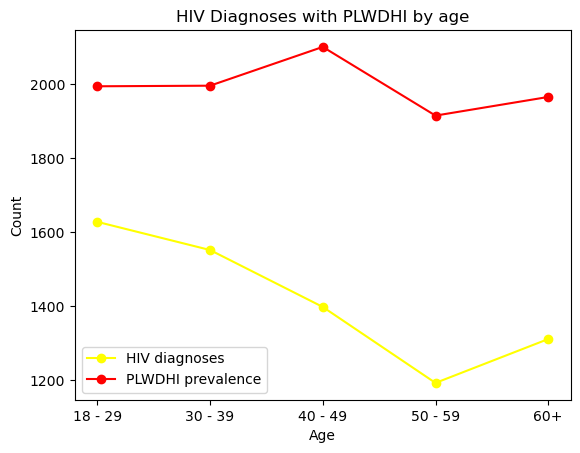

In [449]:
p=data.groupby("Year")
g=p["HIV diagnoses"].sum()
h=p["PLWDHI prevalence"].sum()
label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
plt.plot(label, g, color="yellow", marker='o', linestyle='-', label="HIV diagnoses")
plt.plot(label, h, color="red", marker='o', linestyle='-', label="PLWDHI prevalence")
# Add labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("HIV Diagnoses with PLWDHI by age")
# Add legend
plt.legend()

# Show plot
plt.show()

### Conclusion: The decrease in HIV diagnoses from the 18-29 age group to the 50-59 age group indicates that younger people are more likely to be diagnosed with HIV.The steady PLWDHI prevalence across age groups suggests that once diagnosed with HIV, the prevalence is rather consistent across age groups.The peak in PLWDHI prevalence in the 40-49 age range indicates that this age group has a larger proportion of people living with diagnosed HIV compared to other age groups.

# 20. Year Wise Analysis of %linked to 3months with HIV related death rate.  


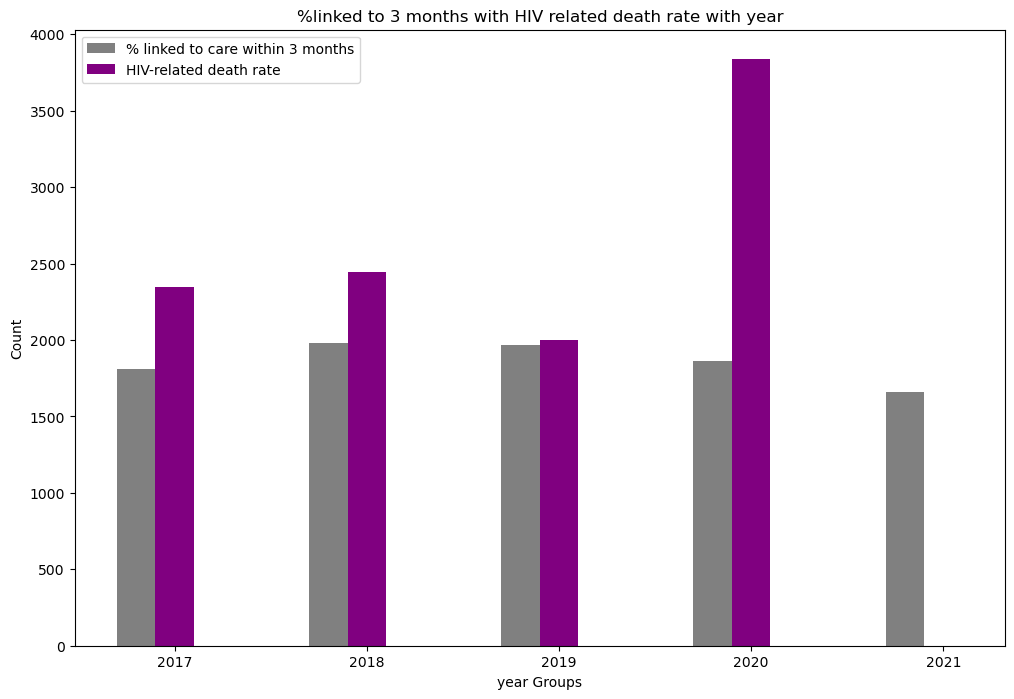

In [450]:
p=data.groupby("Year")
g=p["% linked to care within 3 months"].sum()
h=p["HIV-related death rate"].sum()
#i=p["HIV diagnoses"].sum()
label=[2017, 2018, 2019, 2020,2021]

# Define the position of the bars on the x-axis
x = np.arange(len(label))

# Define the width of the bars
width = 0.2

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each set of bars
rects1 = ax.bar(x - width, g, width, label='% linked to care within 3 months', color='grey')
rects2 = ax.bar(x, h, width, label='HIV-related death rate', color='purple')
#rects3 = ax.bar(x + width, i, width, label='Non-HIV-related death rate', color='blue')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('year Groups')
ax.set_title('%linked to 3 months with HIV related death rate with year')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Display the chart
plt.show()


### Conclusion:The rising trend in the death rate from HIV highlights the need for continued monitoring and focused actions to reduce the escalating death rates linked to HIV. indicate continuous access to care within three months.

# 21.Analysis of Concurrent diagnoses with %viral suppression

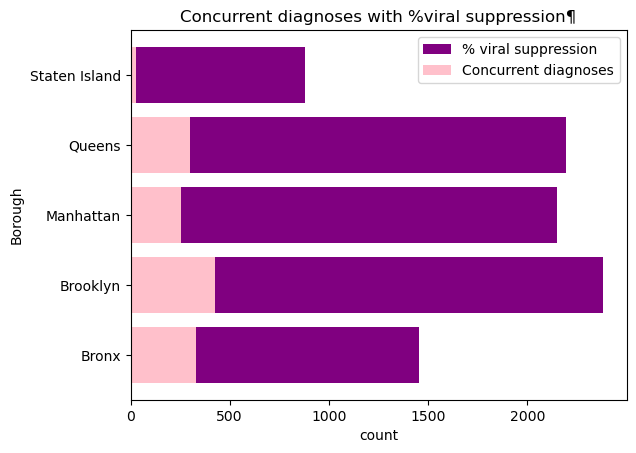

In [451]:
p = data.groupby("Borough")
g = p["Concurrent diagnoses"].sum()
h = p["% viral suppression"].sum()
#plt.xticks(label)
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


plt.barh(label, h, color="purple", label="% viral suppression")
plt.barh(label, g, color="pink", label="Concurrent diagnoses")
# Add labels and title
plt.xlabel("count")
plt.ylabel("Borough")
plt.title("Concurrent diagnoses with %viral suppression¶")

# Add legend
plt.legend()

# Show plot
plt.show()


### Conclusion: graph shows that Brooklyn has the highest percentage of viral suppression, with Manhattan and Queens following at the same level.
### This implies that the success rates of these boroughs in suppressing HIV-related viral infections are comparable.The lower viral suppression rate in Staten Island can point to possible problems or inequalities with treatment adherence, healthcare quality, or access.

## 22. Determination of the city wise analysis of  survey conducted by  the health department.

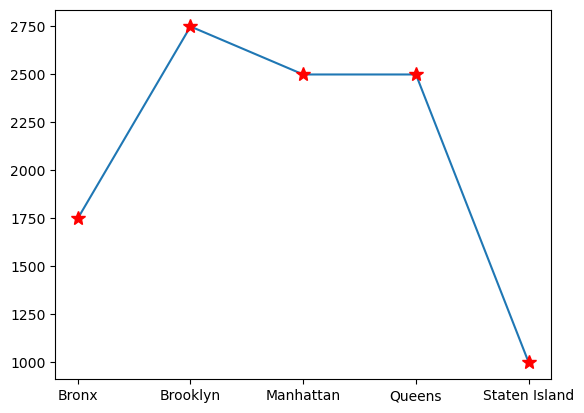

In [452]:
place=data.groupby("Borough")
p=place["Borough"].value_counts()
plt.plot(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],p,marker='*',ms=10,mfc="red",mec="red")

### Conclusion:It concludes that Brooklyn has been surveyed the most extensively during the period, while Staten Island has recorded the least amount of survey activity.

## 23.Age wise PLWDHI prevalence variance

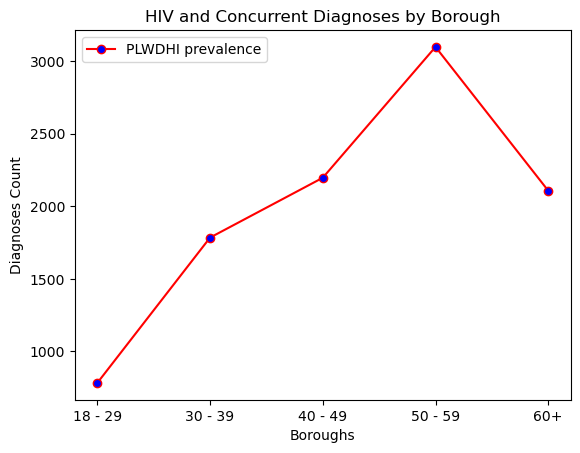

In [453]:
p=data.groupby("Age")

g=p["PLWDHI prevalence"].sum()

label =['18 - 29','30 - 39','40 - 49','50 - 59','60+']
plt.plot(label,g, color="red", marker='o', linestyle='-', label="PLWDHI prevalence",mfc="Blue")

# Add labels and title
plt.xlabel("Boroughs")
plt.ylabel("Diagnoses Count")
plt.title("HIV and Concurrent Diagnoses by Borough")
# Add legend
plt.legend()
# Show plot
plt.show()

### Conclusion: we can see the increasing trend over the age groups till age group 50-59 due to to prolonged HIV exposure, postponed diagnosis, and the long-term cumulative impact of infections that are not treated or are managed insufficiently.then again decreases for age group 60+.

## 24.Determination of Deaths due to HIV/NON_HIV/NORMAL_DEATHS

Age
0    1049.00
1    3256.80
2    4024.25
3    5486.80
4    7003.50
Name: Death rate, dtype: float64

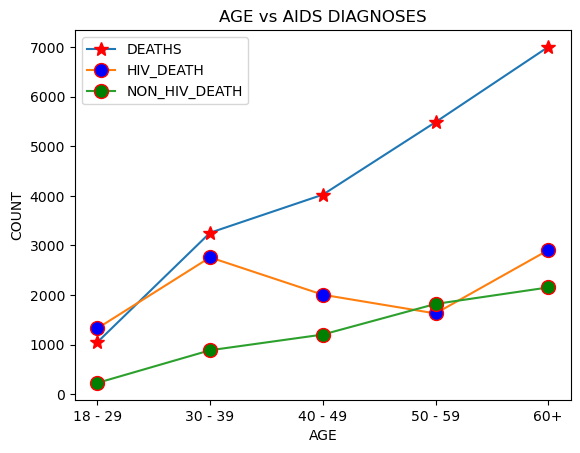

In [454]:
year=data.groupby("Age")
p=year["Death rate"].sum()
q=year["HIV-related death rate"].sum()
r=year["Non-HIV-related death rate"].sum()
plt.plot(['18 - 29','30 - 39','40 - 49','50 - 59','60+'],p,marker='*',label="DEATHS",ms=10,mfc="red",mec="red")
plt.plot(['18 - 29','30 - 39','40 - 49','50 - 59','60+'],q,marker='o',label="HIV_DEATH",ms=10,mfc="blue",mec="red")
plt.plot(['18 - 29','30 - 39','40 - 49','50 - 59','60+'],r,marker='o',label="NON_HIV_DEATH",ms=10,mfc="green",mec="red")
plt.legend();
plt.xlabel("AGE")
plt.ylabel("COUNT")
plt.title("AGE vs AIDS DIAGNOSES")
p

### Conclusion: It concludes the death rates related to HIV, non-HIV causes, and the overall death distribution according to age groups.

In [455]:
data

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,age_group
6264,2017.0,0,1,0,0,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0,0
6265,2017.0,0,1,0,1,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0,0
6266,2017.0,0,1,0,2,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0,0
6267,2017.0,0,1,0,3,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0,0
6268,2017.0,0,1,0,4,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,4,0,4,0,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4
31921,2021.0,4,0,4,1,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0,4
31922,2021.0,4,0,4,2,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0,4
31923,2021.0,4,0,4,3,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4


# 1.Determining the destribution of HIV Diagnoses accross The Borough

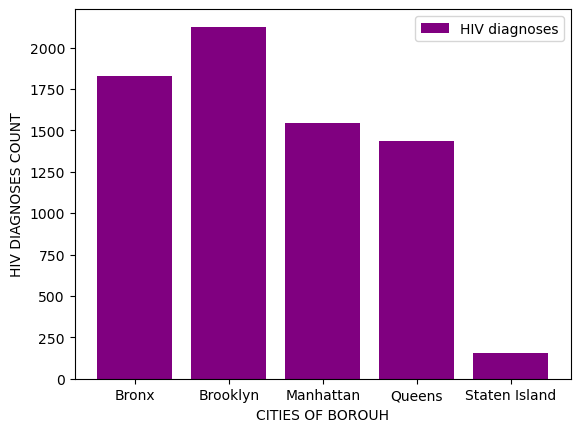

In [456]:
# Borough v/s HIV
p=data.groupby("Borough")
hd=p["HIV diagnoses"].sum()
label=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
plt.bar(label,hd,color="purple",label="HIV diagnoses")
plt.xlabel("CITIES OF BOROUH")
plt.ylabel("HIV DIAGNOSES COUNT")
plt.legend()

## Here By this we can Observe that Brooklyn Has Recorded The HIghest HIV Diagnoses count and Staten island has the Lowest count

# 2. Determination of Age Wise Destribution of HIV In Brooklyn City.

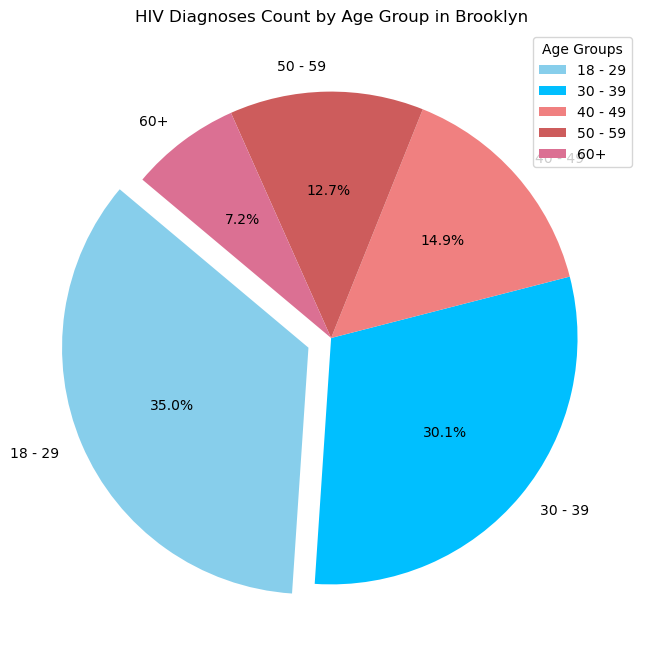

In [457]:
Brooklyn = data[data["Borough"] == 1]

# Group by Age and sum HIV diagnoses
p = Brooklyn.groupby("Age")["HIV diagnoses"].sum()

# Extract labels and counts
labels =['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
counts = p.values.tolist()
# Find the index of the maximum value
max_index = counts.index(max(counts))
# Prepare explode array
explode = [0] * len(labels)
explode[max_index] = 0.1  # Highlight the slice with the highest count
# Plotting pie chart with explode
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, colors=["skyblue", "deepskyblue", "lightcoral", "indianred", "palevioletred"], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("HIV Diagnoses Count by Age Group in Brooklyn")
plt.legend(title="Age Groups", loc="best")
plt.show()

## In Brooklyn city Age Group 18-19 has Affected The most and 60+ age group has least affected.

# 3.How many male and female are affected by HIV 

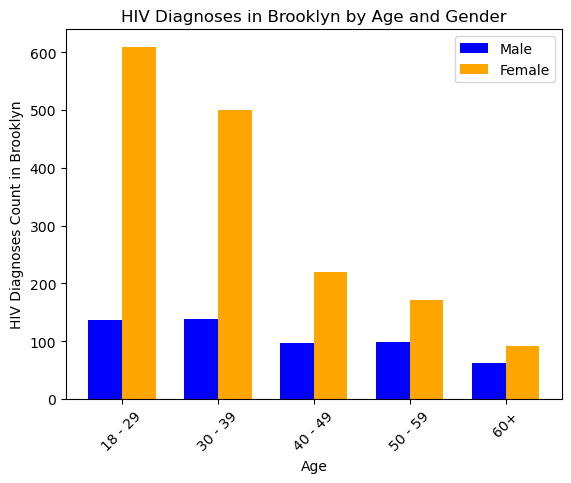

In [458]:
#And then we find which geder has the effected most in different age group
# Assuming 'data' is your DataFrame
Brooklyn = data[data["Borough"] == 1]
# Group by Age and Gender
grouped = Brooklyn.groupby(["Age", "Gender"])["HIV diagnoses"].sum().unstack()
# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(grouped))
# Create bar plots for each gender
bar1 = ax.bar(index, grouped[0], bar_width, label='Male', color='blue')
bar2 = ax.bar(index + bar_width, grouped[1], bar_width, label='Female', color='orange')
# Labeling
ax.set_xlabel('Age')
ax.set_ylabel('HIV Diagnoses Count in Brooklyn')
ax.set_title('HIV Diagnoses in Brooklyn by Age and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+'])
ax.legend()

plt.xticks(rotation=45)
plt.show()


# 4.HIV Diagnoses and Giv related Death rate in Brooklyn By Age And gender

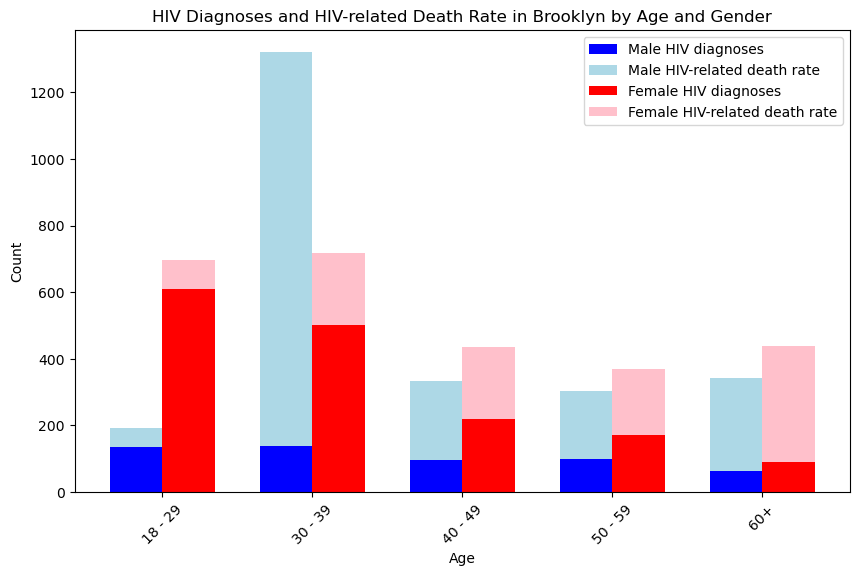

In [459]:

# Assuming 'data' is your DataFrame
Brooklyn = data[data["Borough"] == 1]
p = Brooklyn.groupby(["Age", "Gender"]).sum().unstack()

label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
male_hiv_d = p["HIV-related death rate"].loc[:, 0]
female_hiv_d = p["HIV-related death rate"].loc[:, 1]
male_hiv = p["HIV diagnoses"].loc[:, 0]
female_hiv = p["HIV diagnoses"].loc[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(label))

# Male bars
bar1 = ax.bar(index, male_hiv, bar_width, label='Male HIV diagnoses', color='blue')
bar2 = ax.bar(index, male_hiv_d, bar_width, bottom=male_hiv, label='Male HIV-related death rate', color='lightblue')

# Female bars
bar3 = ax.bar(index + bar_width, female_hiv, bar_width, label='Female HIV diagnoses', color='red')
bar4 = ax.bar(index + bar_width, female_hiv_d, bar_width, bottom=female_hiv, label='Female HIV-related death rate', color='pink')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('HIV Diagnoses and HIV-related Death Rate in Brooklyn by Age and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()

plt.xticks(rotation=45)
plt.show()


# 2nd set

# 1.Aids Diagnoses count By Borough

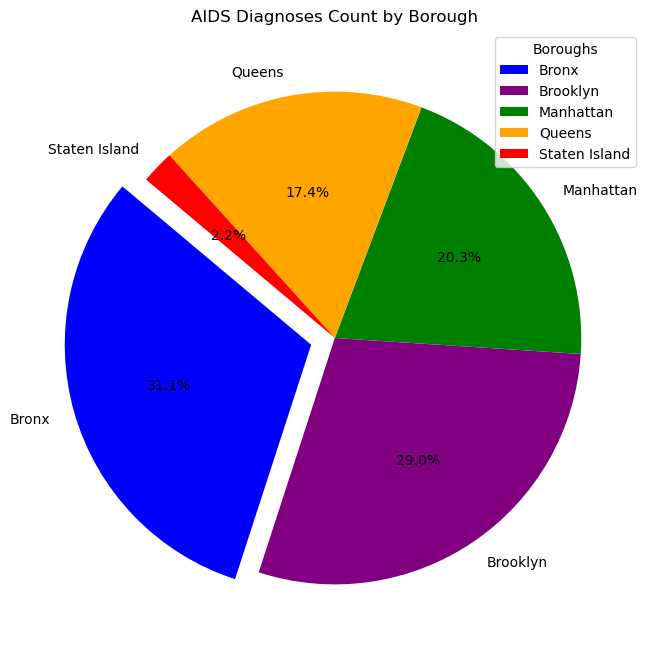

In [460]:
# Borough v/s HIV
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
p = data.groupby("Borough")
hd = p["AIDS diagnoses"].sum()
label = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
explode = [0.1 if i == largest_index else 0 for i in range(len(labels))]
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(hd, labels=label, colors=["blue", "purple", "green", "orange", "red"], autopct='%1.1f%%', startangle=140,explode=explode)
plt.title("AIDS Diagnoses Count by Borough")
plt.legend(title="Boroughs")
plt.show()


# 2. In Bronx How HIV Diagnoses /year

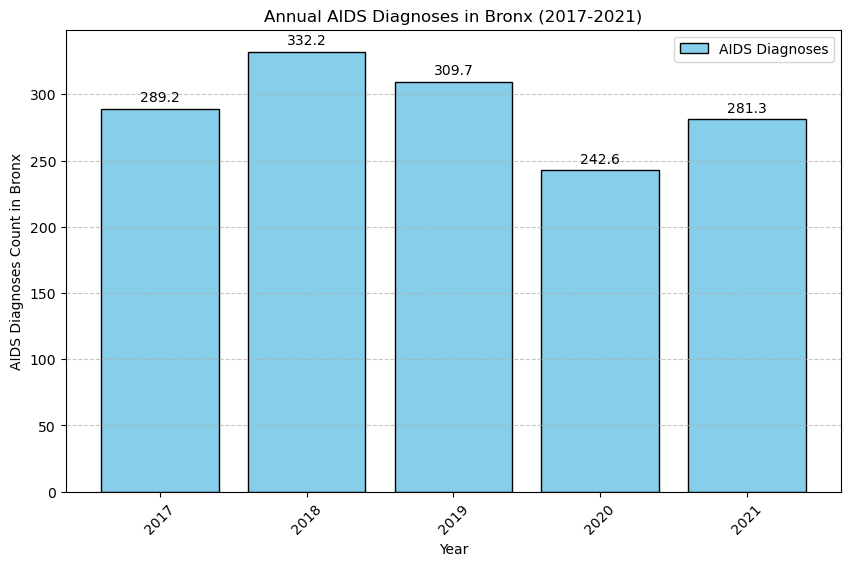

In [461]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
Bronx = data[data["Borough"] == 0]
p = Bronx.groupby("Year")
Aids = p["AIDS diagnoses"].sum()

label = [2017, 2018, 2019, 2020, 2021]

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(label, Aids, color='skyblue', edgecolor='black', label='AIDS Diagnoses')

# Adding value annotations on the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel("Year")
plt.ylabel("AIDS Diagnoses Count in Bronx")
plt.title("Annual AIDS Diagnoses in Bronx (2017-2021)")
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only on y-axis

plt.show()


# 3. Gender Wise /Aids in bronox

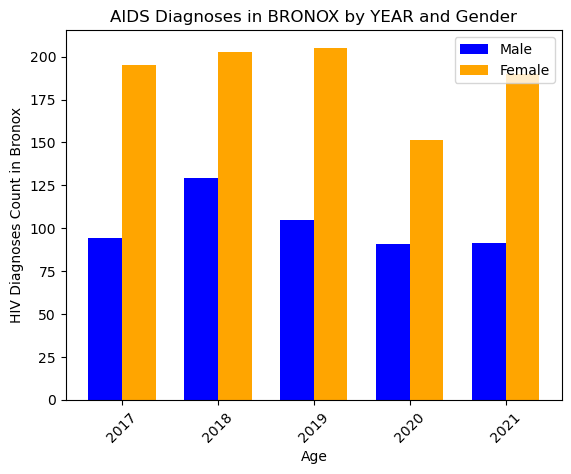

In [462]:
Bronox = data[data["Borough"] == 0]
# Group by Age and Gender
grouped = Bronox.groupby(["Year", "Gender"])["AIDS diagnoses"].sum().unstack()
# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(grouped))
# Create bar plots for each gender
bar1 = ax.bar(index, grouped[0], bar_width, label='Male', color='blue')
bar2 = ax.bar(index + bar_width, grouped[1], bar_width, label='Female', color='orange')
# Labeling
ax.set_xlabel('Age')
ax.set_ylabel('HIV Diagnoses Count in Bronox')
ax.set_title('AIDS Diagnoses in BRONOX by YEAR and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([2017, 2018, 2019, 2020, 2021])
ax.legend()
plt.xticks(rotation=45)
plt.show()

# 4. HIV related Deaths in bronon with HIV Diagnoses

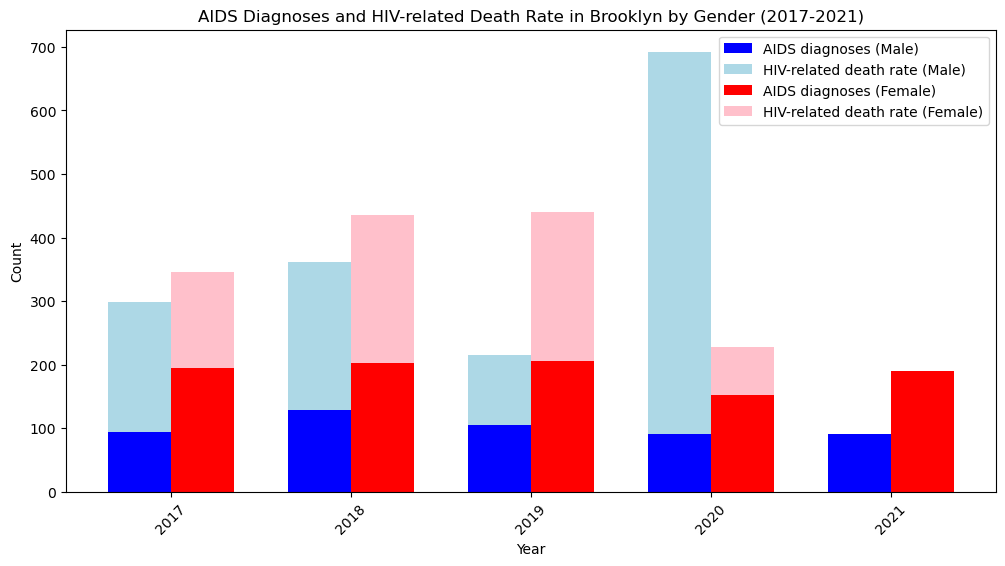

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
Brooklyn = data[data["Borough"] == 0]
p = Brooklyn.groupby(["Year", "Gender"])

label = [2017, 2018, 2019, 2020, 2021]
hiv_d_male = p["HIV-related death rate"].sum().unstack().loc[:, 0]
Hiv_male = p["AIDS diagnoses"].sum().unstack().loc[:, 0]
hiv_d_female = p["HIV-related death rate"].sum().unstack().loc[:, 1]
Hiv_female = p["AIDS diagnoses"].sum().unstack().loc[:, 1]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(label))

bar1_male = ax.bar(index - bar_width/2, Hiv_male, bar_width, label='AIDS diagnoses (Male)', color='blue')
bar2_male = ax.bar(index - bar_width/2, hiv_d_male, bar_width, bottom=Hiv_male, label='HIV-related death rate (Male)', color='lightblue')

bar1_female = ax.bar(index + bar_width/2, Hiv_female, bar_width, label='AIDS diagnoses (Female)', color='red')
bar2_female = ax.bar(index + bar_width/2, hiv_d_female, bar_width, bottom=Hiv_female, label='HIV-related death rate (Female)', color='pink')

ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('AIDS Diagnoses and HIV-related Death Rate in Brooklyn by Gender (2017-2021)')
ax.set_xticks(index)
ax.set_xticklabels(label)
ax.legend()

plt.xticks(rotation=45)
plt.show()


# set 3


# 1.Race wise Analysis of HIV Diagboses

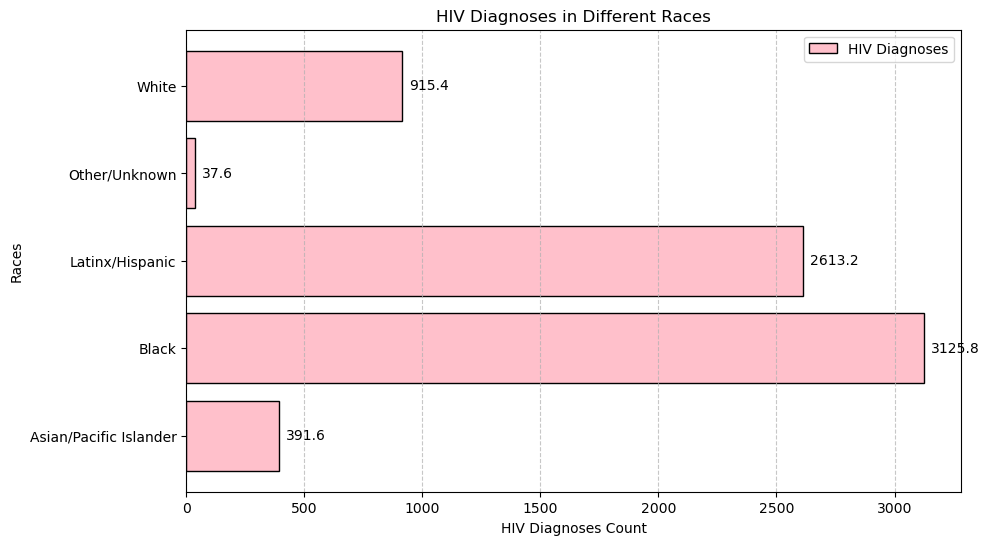

In [464]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
p = data.groupby("Race")
hd = p["HIV diagnoses"].sum()
label = ['Asian/Pacific Islander', 'Black', 'Latinx/Hispanic', 'Other/Unknown', 'White']

# Plotting the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(label, hd, color='pink', edgecolor='black', label='HIV Diagnoses')

# Adding value annotations on the bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # 5 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

ax.set_xlabel("HIV Diagnoses Count")
ax.set_ylabel("Races")
ax.set_title("HIV Diagnoses in Different Races")
ax.legend()

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid only on x-axis

plt.show()


# 2. Age group in BLack people HIV Diagnoses

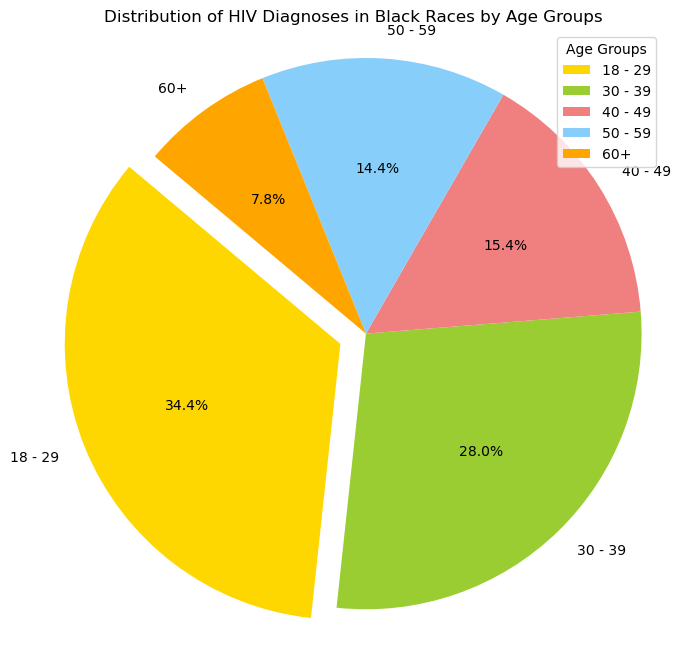

In [465]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Race' column denotes race where 1 represents Black race
black = data[data["Race"] == 1]
p = black.groupby("Age")
Hiv = p["HIV diagnoses"].sum()
labels = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

# Determine the index of the largest slice
largest_index = Hiv.idxmax()

# Prepare explode array
explode = [0.1 if i == largest_index else 0 for i in range(len(labels))]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Hiv, labels=labels, autopct='%1.1f%%', colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange'],
        startangle=140, explode=explode)
plt.title('Distribution of HIV Diagnoses in Black Races by Age Groups')
plt.legend(loc='best', title="Age Groups", labels=labels)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# 3.GEnder wise Division

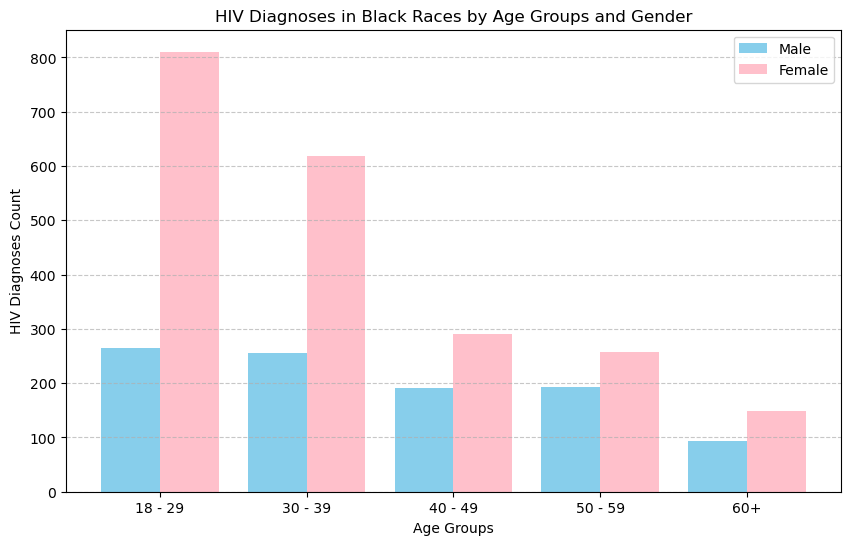

In [466]:
black = data[data["Race"] == 1]
p = black.groupby(["Age", "Gender"])
Hiv = p["HIV diagnoses"].sum().unstack()

labels = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

# Plotting the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4
index = range(len(labels))

bar1 = ax.bar(index, Hiv[0], bar_width, label='Male', color='skyblue')
bar2 = ax.bar([i + bar_width for i in index], Hiv[1], bar_width, label='Female', color='pink')

ax.set_xlabel('Age Groups')
ax.set_ylabel('HIV Diagnoses Count')
ax.set_title('HIV Diagnoses in Black Races by Age Groups and Gender')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid only on y-axis

plt.show()

# 4.HIV related Death rate vs HIV Diagnoses

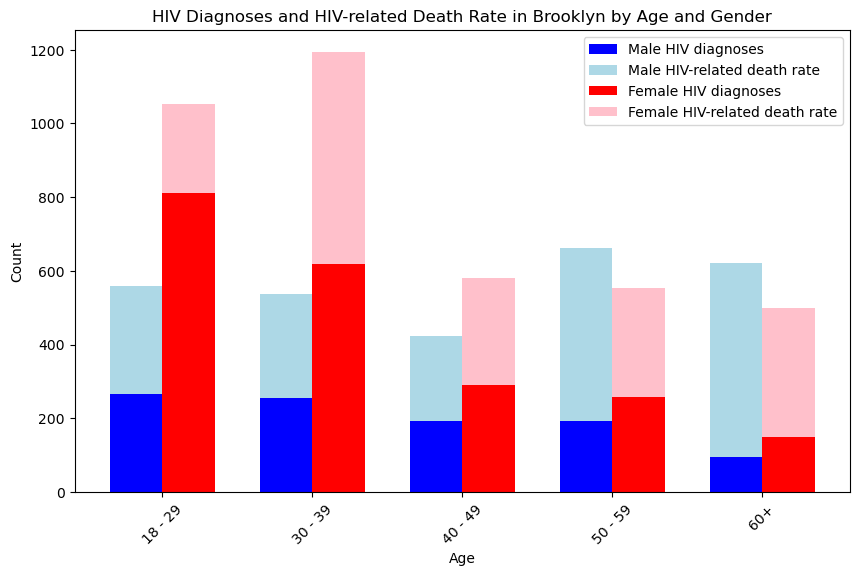

In [467]:
Black = data[data["Race"] == 1]
p = Black.groupby(["Age", "Gender"]).sum().unstack()

label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
male_hiv_d = p["HIV-related death rate"].loc[:, 0]
female_hiv_d = p["HIV-related death rate"].loc[:, 1]
male_hiv = p["HIV diagnoses"].loc[:, 0]
female_hiv = p["HIV diagnoses"].loc[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(label))

# Male bars
bar1 = ax.bar(index, male_hiv, bar_width, label='Male HIV diagnoses', color='blue')
bar2 = ax.bar(index, male_hiv_d, bar_width, bottom=male_hiv, label='Male HIV-related death rate', color='lightblue')

# Female bars
bar3 = ax.bar(index + bar_width, female_hiv, bar_width, label='Female HIV diagnoses', color='red')
bar4 = ax.bar(index + bar_width, female_hiv_d, bar_width, bottom=female_hiv, label='Female HIV-related death rate', color='pink')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('HIV Diagnoses and HIV-related Death Rate in Brooklyn by Age and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()

plt.xticks(rotation=45)
plt.show()


# set 4

In [468]:
data

,Year,Borough,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,age_group
6264,2017.0,0,1,0,0,0.0,0.0,0.0,0.80,0.0,0.00,0.06,1.00,0.0,0.0,0.0,0.0,0
6265,2017.0,0,1,0,1,9.0,73.0,0.0,0.78,4.0,45.25,2.90,0.59,0.0,0.0,0.0,0.0,0
6266,2017.0,0,1,0,2,10.0,73.0,1.0,0.89,4.0,26.70,0.90,0.66,1.0,7.3,0.0,7.0,0
6267,2017.0,0,1,0,3,0.0,0.0,0.0,1.00,0.0,0.00,0.00,0.66,0.0,0.0,0.0,0.0,0
6268,2017.0,0,1,0,4,0.0,0.0,0.0,0.70,0.0,0.00,3.00,0.50,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021.0,4,0,4,0,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4
31921,2021.0,4,0,4,1,0.0,0.0,0.0,0.60,0.0,0.00,0.04,1.00,0.0,0.0,0.0,0.0,4
31922,2021.0,4,0,4,2,0.0,0.0,0.0,0.71,0.0,0.00,0.70,0.50,0.0,0.0,0.0,0.0,4
31923,2021.0,4,0,4,3,0.0,0.0,0.0,0.80,0.0,0.00,0.00,1.00,0.0,0.0,0.0,0.0,4


# 1.Which year saw the highest number of HIV diagnoses, and how does it compare to the other years displayed?

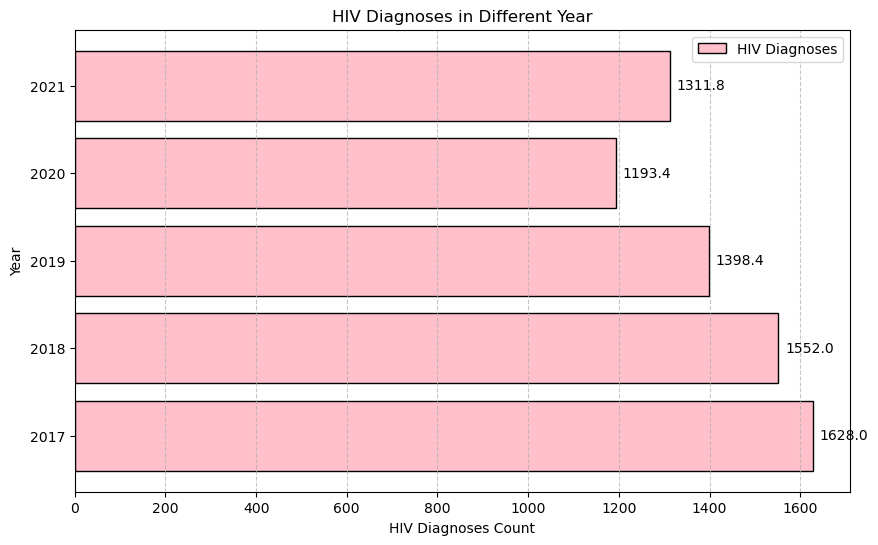

In [490]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
p = data.groupby("Year")
hd = p["HIV diagnoses"].sum()
label = [2017, 2018, 2019, 2020, 2021]

# Plotting the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(label, hd, color='pink', edgecolor='black', label='HIV Diagnoses')

# Adding value annotations on the bars
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),  # 5 points horizontal offset
                textcoords="offset points",
                ha='left', va='center')

ax.set_xlabel("HIV Diagnoses Count")
ax.set_ylabel("Year")
ax.set_title("HIV Diagnoses in Different Year")
ax.legend()

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid only on x-axis

plt.show()

## We can observe that  2017 has Recorded The Highest HIV Diagnnoses count Comared to all the Years and The count decrease over the years from(2017 to 2020).


# 2.Which age group had the highest proportion of HIV diagnoses in the year 2017, and how does it compare to the other age groups?



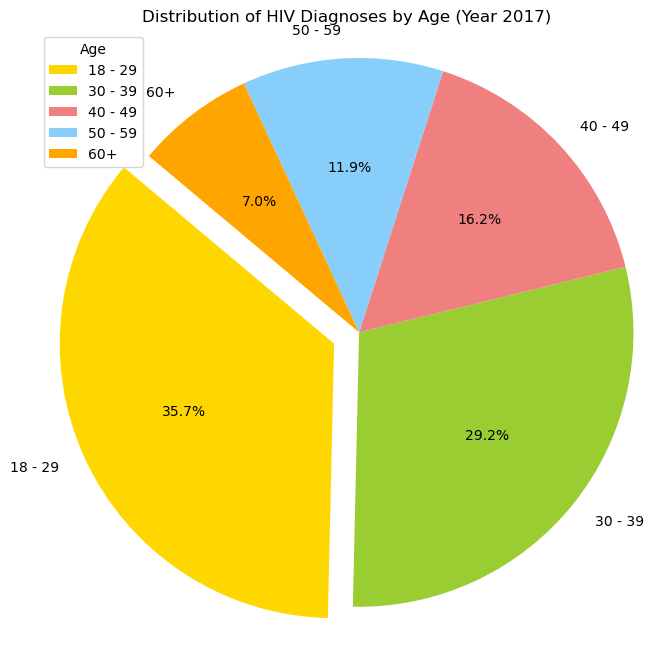

In [489]:
year = data[data["Year"] == 2017]

# Group by Race and sum AIDS diagnoses
p = year.groupby("Age")["HIV diagnoses"].sum()
AIDS = p.values.tolist()
label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']

# Determine the index of the largest slice
largest_index = np.argmax(AIDS)

# Prepare explode array
explode = [0] * len(labels)
explode[largest_index] = 0.1  # Explode the slice with the highest count

# Plotting pie chart with explode
plt.figure(figsize=(8, 8))
plt.pie(AIDS, labels=label, autopct='%1.1f%%', colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange'],
        startangle=140, explode=explode)
plt.title('Distribution of HIV Diagnoses by Age (Year 2017)')
plt.legend(loc='best', title="Age", labels=label)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## In Year 2017 it is observed that age group 18-29 has the Highest HIV Diagnoses rate and 60+ age group has the least HIV Diagnoses Count

# 3.How do HIV diagnoses vary by age and gender in the year 2017? Which age group and gender combination had the highest number of HIV diagnoses, and how does it compare to other groups?

der wise HIV diagnoses in 2017

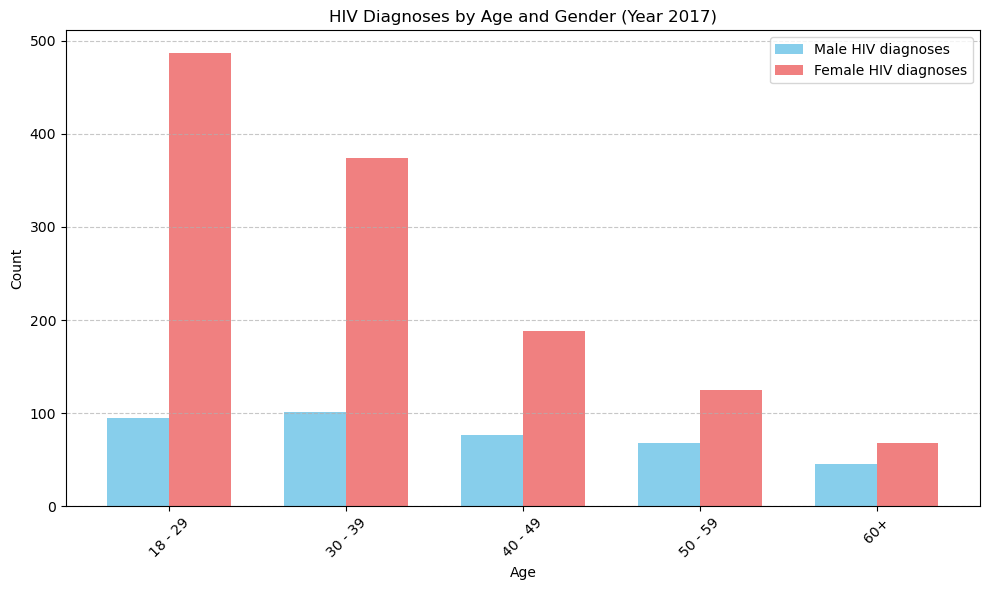

In [486]:
year = data[data["Year"] == 2017]

# Group by Age and Gender, and sum HIV diagnoses
p = year.groupby(["Age", "Gender"])["HIV diagnoses"].sum()

# Extracting data for plotting
label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
male_HIV = p.loc[:, 0].values.tolist()
female_HIV = p.loc[:, 1].values.tolist()

# Setting up the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(label))

bar1 = ax.bar(index, male_HIV, bar_width, label='Male HIV diagnoses', color='skyblue')
bar2 = ax.bar(index + bar_width, female_HIV, bar_width, label='Female HIV diagnoses', color='lightcoral')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('HIV Diagnoses by Age and Gender (Year 2017)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()

# Adjust layout and show plot
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

## In 2017, it was observed that females had a higher number of HIV diagnoses compared to males, particularly in the 18-29 age group which recorded the highest count of diagnoses.

# 4.How do HIV diagnoses and HIV-related death rates differ between genders across various age groups in Brooklyn in the year 2017?

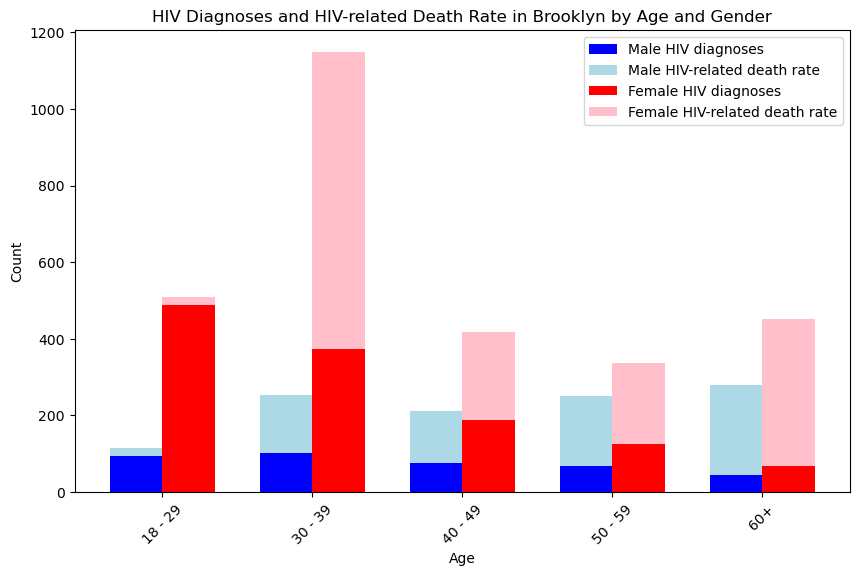

In [487]:
Black = data[data["Year"] == 2017]
p = Black.groupby(["Age", "Gender"]).sum().unstack()

label = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60+']
male_hiv_d = p["HIV-related death rate"].loc[:, 0]
female_hiv_d = p["HIV-related death rate"].loc[:, 1]
male_hiv = p["HIV diagnoses"].loc[:, 0]
female_hiv = p["HIV diagnoses"].loc[:, 1]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(label))

# Male bars
bar1 = ax.bar(index, male_hiv, bar_width, label='Male HIV diagnoses', color='blue')
bar2 = ax.bar(index, male_hiv_d, bar_width, bottom=male_hiv, label='Male HIV-related death rate', color='lightblue')

# Female bars
bar3 = ax.bar(index + bar_width, female_hiv, bar_width, label='Female HIV diagnoses', color='red')
bar4 = ax.bar(index + bar_width, female_hiv_d, bar_width, bottom=female_hiv, label='Female HIV-related death rate', color='pink')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('HIV Diagnoses and HIV-related Death Rate in Brooklyn by Age and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(label)
ax.legend()

plt.xticks(rotation=45)
plt.show()


## In 2017, it can be observed that the age group 30-39 had the highest number of HIV-related deaths. Overall, it was observed that females dominated the HIV diagnosis count the most.